# Model Design

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from scripts.data_processor import load_processed_data

classes = {1: 'new', 0: 'used'} # tags for human readabilty
save_graph = True # Option for saving graphs' images

In [2]:
# Logging file
try:
    history = pd.read_csv('./data/train_logs.csv',index_col='training')
    print("Logging file loaded from './data/train_logs.csv'.")
    print(f"Register contains data of {len(history)} trainings.")
except FileNotFoundError:
    print("Logging file was not found. A new logging file was created.")
    history = pd.DataFrame(columns=['features','model','items','cm','metrics','roc_auc'])
    history.index.name = 'training' # Set the name for the DataFrame's index
except Exception as e:
    # Catch other potential errors during CSV loading (e.g., parsing errors)
    print(f"An unexpected error occurred while loading the logging file: {e}")
    print("Creating a new logging file instead.")
    history = pd.DataFrame(columns=['features', 'model', 'items', 'cm', 'metrics', 'roc_auc'])
    history.index.name = 'training'
history

Logging file loaded from './data/train_logs.csv'.
Register contains data of 13 trainings.


,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7765937558422135, 0.2234062441577865], [0....","{'new': {'precision': 0.8795257251746771, 'rec...",0.825852
8,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7932323798840905, 0.20676762011590952], [0...","{'new': {'precision': 0.8797428986108231, 'rec...",0.832964


In [ ]:
# Remove last record ('undo' feature)
# history = history.drop(index=len(history)-1)

***NOTE:*** *Each section of this notebook should be run independently, as they correspond to distinct iterations of the productive cycle, alternating between EDA & Feature Selection (`EDA.ipynb`) and Train & Evaluate (`model_design.ipynb`).*

---
---

# 1º iteration - Quick training test

In [ ]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [25]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [127]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [133]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [134]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  uint8  
 1   automatic_relist              89109 non-null  uint8  
 2   price_scaled                  89109 non-null  float64
 3   initial_quantity_scaled       89109 non-null  float64
 4   is_USD                        89109 non-null  uint8  
 5   listing_type_id_free          89109 non-null  float64
 6   listing_type_id_gold          89109 non-null  float64
 7   listing_type_id_gold_premium  89109 non-null  float64
 8   listing_type_id_gold_pro      89109 non-null  float64
 9   listing_type_id_gold_special  89109 non-null  float64
 10  listing_type_id_silver        89109 non-null  float64
 11  buying_mode_buy_it_now        89109 non-null  float64
 12  buying_mode_classified        89109 non-null  float64
 13  s

In [138]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [140]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           9905 non-null   uint8  
 1   automatic_relist              9905 non-null   uint8  
 2   price_scaled                  9905 non-null   float64
 3   initial_quantity_scaled       9905 non-null   float64
 4   is_USD                        9905 non-null   uint8  
 5   listing_type_id_free          9905 non-null   float64
 6   listing_type_id_gold          9905 non-null   float64
 7   listing_type_id_gold_premium  9905 non-null   float64
 8   listing_type_id_gold_pro      9905 non-null   float64
 9   listing_type_id_gold_special  9905 non-null   float64
 10  listing_type_id_silver        9905 non-null   float64
 11  buying_mode_buy_it_now        9905 non-null   float64
 12  buying_mode_classified        9905 non-null   float64
 13  sta

In [141]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [142]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

## Model training

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [146]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


## Model evaluation

In [35]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [ ]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl, digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

         new      0.680     0.959     0.796      5349
        used      0.907     0.471     0.620      4556

    accuracy                          0.735      9905
   macro avg      0.794     0.715     0.708      9905
weighted avg      0.785     0.735     0.715      9905



In [45]:
f1_score(y_test, y_pred, average='binary')

0.7959944108057755

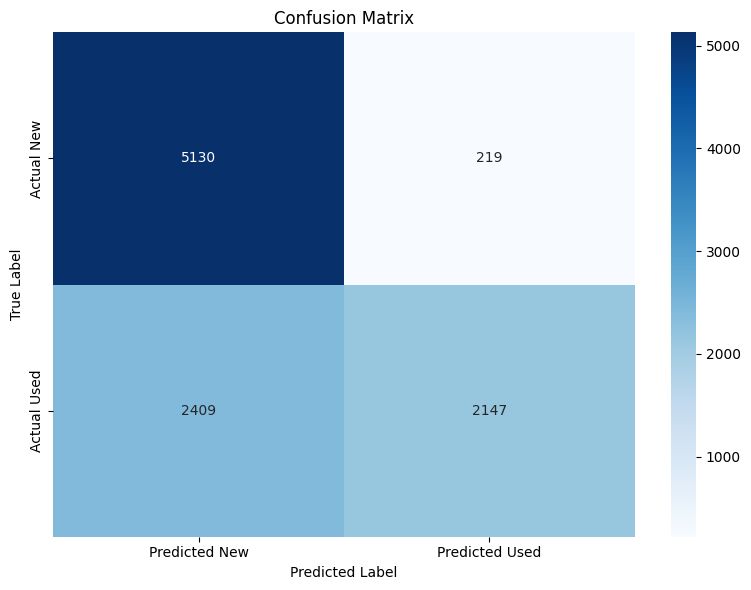

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

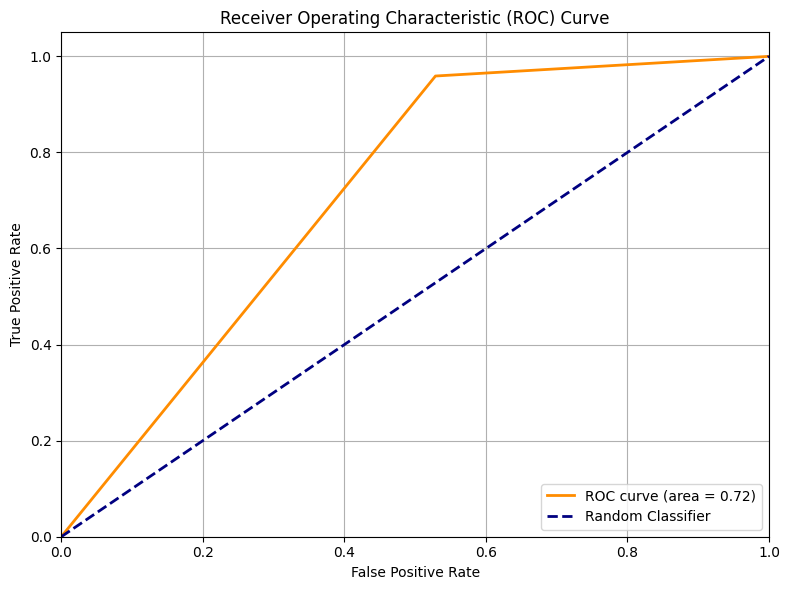

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [ ]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [193]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.9590577678070668, 0.04094223219293326], [0...
metrics     {'new': {'precision': 0.6804615996816554, 'rec...
roc_auc                                              0.715152
Name: 0, dtype: object

## Analysis

**Key Takeaways:**

1.  **Class Imbalance in Prediction Quality:** The model is **heavily biased towards predicting "new."** It's excellent at identifying "new" items (high recall of 0.96 for 'new'), meaning it correctly catches 96% of all actual "new" items. However, it **struggles significantly with identifying "used" items** (low recall of 0.47 for 'used'), correctly identifying less than half of them. When the model does predict "used," it's usually correct (high precision of 0.91 for 'used'), but it misses a substantial number of actual "used" items. This manifests as a high count of **False Negatives for 'used'** (actual 'used' items misclassified as 'new') and, equivalently, a high count of **False Positives for 'new'** (actual 'used' items misclassified as 'new').

2.  **High False Positives for "new" / High False Negatives for "used":** The **2409 False Positives for "new"** in the confusion matrix explicitly mean that 2409 items that were **actually "used" were incorrectly classified as "new."** This large number directly explains the low recall for "used" ($2147 \text{ TP} / (2147 \text{ TP} + 2409 \text{ FN}) = 0.47$).

3.  **Accuracy is Misleading:** With a significant imbalance in performance across classes and given the class distribution (5349 'new' vs. 4556 'used'), **accuracy alone is not a reliable metric.** The model's strong performance on the slightly larger class ('new') inflates the overall accuracy, masking its poor ability to identify 'used' items.

**Conclusions:**

* Some features are **poor predictors** of the target, showing **correlations close to 0**. This likely contributes to the high number of false positives observed.
* The continuous variables `price` and `quantity` exhibit **highly skewed distributions** with a significant presence of positive outliers. For 'cantidad' in particular, it appears more beneficial to consider if the quantity is simply **greater than 1**, as this seems to influence the probability of an item being 'new'. This suggests a valuable opportunity for feature engineering.
* Regarding the **dummy variables for `listing_type_id`**, only certain categories appear to be relevant. Specifically, the distinction between **paid and free users** seems to be a key differentiator. Notably, 'gold_pro' and 'gold_premium' tiers show little correlation, while lower-tier categories exhibit stronger predictive power.
* The **`status` variable** should not be considered for the model, as the **vast majority of items are 'active'**, providing very little discriminating information.

---
# 2º iteration - Grouping dummies

In [ ]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [6]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [7]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled',
       'initial_quantity_scaled', 'is_USD', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified'],
      dtype='object')

In [8]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [9]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [10]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accepts_mercadopago      89109 non-null  uint8  
 1   automatic_relist         89109 non-null  uint8  
 2   price_scaled             89109 non-null  float64
 3   initial_quantity_scaled  89109 non-null  float64
 4   is_USD                   89109 non-null  uint8  
 5   free_tier                89109 non-null  bool   
 6   buying_mode_buy_it_now   89109 non-null  float64
 7   buying_mode_classified   89109 non-null  float64
dtypes: bool(1), float64(4), uint8(3)
memory usage: 3.1 MB


In [14]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [16]:
X_train.drop(columns=['price_scaled'], inplace=True)
X_test.drop(columns=['price_scaled'], inplace=True)

In [17]:
X_train.drop(columns=['is_USD'], inplace=True)
X_test.drop(columns=['is_USD'], inplace=True)

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accepts_mercadopago      9905 non-null   uint8  
 1   automatic_relist         9905 non-null   uint8  
 2   initial_quantity_scaled  9905 non-null   float64
 3   free_tier                9905 non-null   bool   
 4   buying_mode_buy_it_now   9905 non-null   float64
 5   buying_mode_classified   9905 non-null   float64
dtypes: bool(1), float64(3), uint8(2)
memory usage: 261.3 KB


In [19]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [21]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [22]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",NaN,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Model training

In [23]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [24]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


## Model evaluation

In [25]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [26]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

         new      0.681     0.958     0.796      5349
        used      0.906     0.472     0.621      4556

    accuracy                          0.735      9905
   macro avg      0.794     0.715     0.708      9905
weighted avg      0.784     0.735     0.715      9905



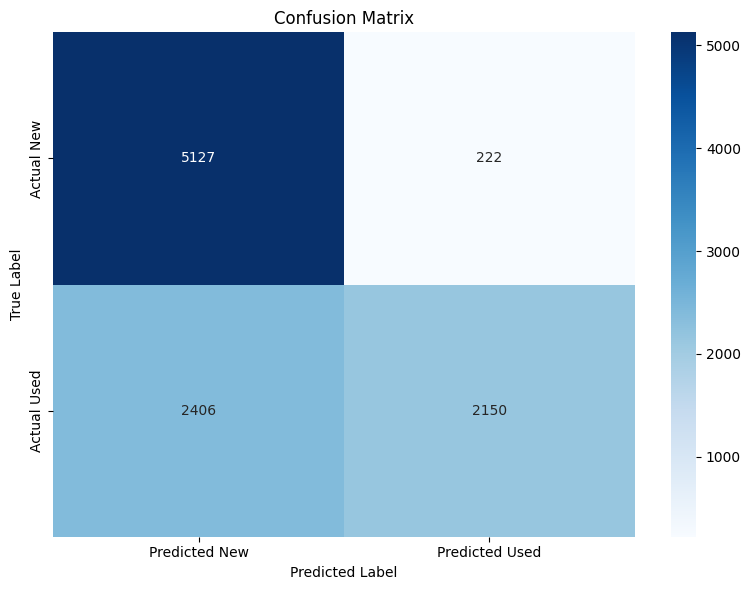

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

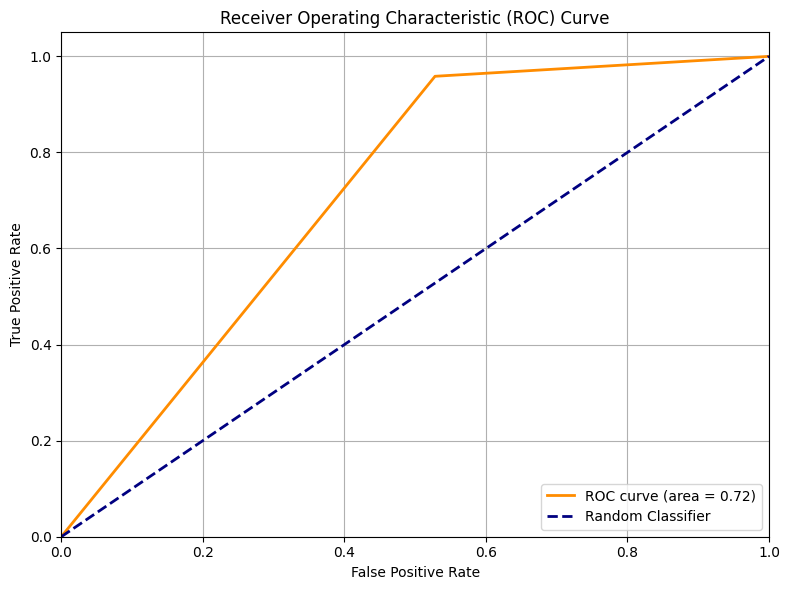

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [29]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [30]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.9584969153112731, 0.04150308468872686], [0...
metrics     {'new': {'precision': 0.680605336519315, 'reca...
roc_auc                                              0.715201
Name: 1, dtype: object

## Analysis

**Key Takeaways:**

1. The number of **features** was **reduced by 46.7%** without significant impact on performance.

**Conclusions:**

* This represents an improvement in hardware usage, reducing memory needs and processing time.

---
# 3º iteration - Synthetic features

In [ ]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [56]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [57]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled',
       'initial_quantity_scaled', 'is_USD', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'is_weekend',
       'is_working_hours'],
      dtype='object')

In [58]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [59]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [60]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accepts_mercadopago      89109 non-null  uint8  
 1   automatic_relist         89109 non-null  uint8  
 2   price_scaled             89109 non-null  float64
 3   initial_quantity_scaled  89109 non-null  float64
 4   is_USD                   89109 non-null  uint8  
 5   free_tier                89109 non-null  bool   
 6   buying_mode_buy_it_now   89109 non-null  float64
 7   buying_mode_classified   89109 non-null  float64
 8   is_weekend               89109 non-null  int64  
 9   is_working_hours         89109 non-null  int64  
dtypes: bool(1), float64(4), int64(2), uint8(3)
memory usage: 4.4 MB


In [62]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [64]:
X_train.drop(columns=['price_scaled'], inplace=True)
X_test.drop(columns=['price_scaled'], inplace=True)

In [65]:
X_train.drop(columns=['is_USD'], inplace=True)
X_test.drop(columns=['is_USD'], inplace=True)

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accepts_mercadopago      9905 non-null   uint8  
 1   automatic_relist         9905 non-null   uint8  
 2   initial_quantity_scaled  9905 non-null   float64
 3   free_tier                9905 non-null   bool   
 4   buying_mode_buy_it_now   9905 non-null   float64
 5   buying_mode_classified   9905 non-null   float64
 6   is_weekend               9905 non-null   int64  
 7   is_working_hours         9905 non-null   int64  
dtypes: bool(1), float64(3), int64(2), uint8(2)
memory usage: 416.1 KB


In [67]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [70]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [71]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",NaN,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Model training

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42) # Added balanced classes
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [86]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


## Model evaluation

In [83]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [85]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

         new      0.681     0.958     0.796      5349
        used      0.906     0.472     0.621      4556

    accuracy                          0.735      9905
   macro avg      0.794     0.715     0.708      9905
weighted avg      0.784     0.735     0.715      9905



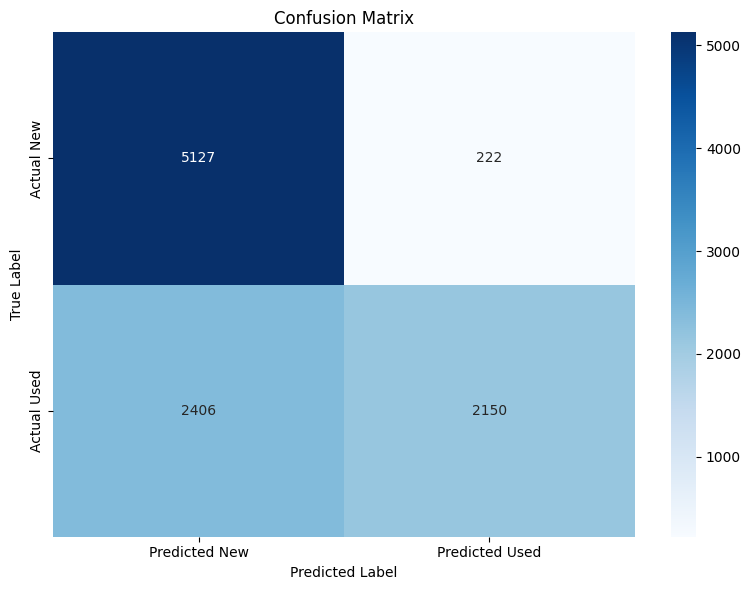

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

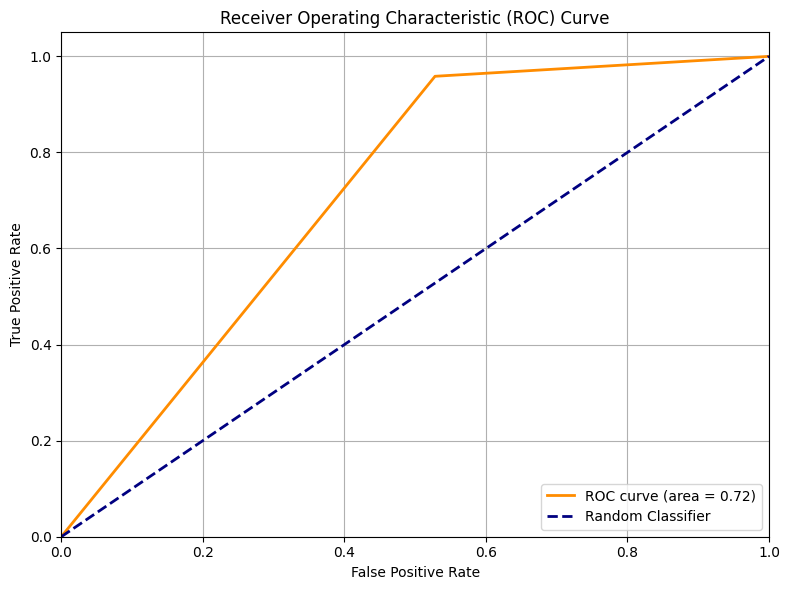

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [79]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [80]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.9584969153112731, 0.04150308468872686], [0...
metrics     {'new': {'precision': 0.680605336519315, 'reca...
roc_auc                                              0.715201
Name: 2, dtype: object

## Analysis

**Key Takeaways:**

1. There's no any improvement by adding time-related features.
1. Model had exactly the same results as previous training.

**Conclusions:**

* Consistent metric and confusion matrix results across successive classification model trainings often indicate the presence of a few predominant features. 
* This stability implies that the model's decision-making process is heavily reliant on these powerful features, making it less susceptible to minor variations or noise from less influential ones.

### Coefficients Importance

In [ ]:
feature_names = X_train.columns

In [ ]:
# Let's access the coefficients to verify what feature is more influential
coefficients = model.coef_[0]
intercept = model.intercept_[0] 

print("Model Intercept:", intercept)
print("\nCoefficients for each feature:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\n--- Features by Absolute Magnitude (Most Influential) ---")
# Create a DataFrame to sort by absolute coefficient magnitude
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coef_df)

Model Intercept: -0.6540249894308093

Coefficients for each feature:
accepts_mercadopago: 0.2041
automatic_relist: 2.3862
initial_quantity_scaled: 17.7865
free_tier: -3.1183
buying_mode_buy_it_now: 0.8281
buying_mode_classified: -0.6810
is_weekend: -0.2090
is_working_hours: 0.2146

--- Features by Absolute Magnitude (Most Influential) ---
                   Feature  Coefficient  Abs_Coefficient
2  initial_quantity_scaled    17.786505        17.786505
3                free_tier    -3.118316         3.118316
1         automatic_relist     2.386157         2.386157
4   buying_mode_buy_it_now     0.828097         0.828097
5   buying_mode_classified    -0.681040         0.681040
7         is_working_hours     0.214642         0.214642
6               is_weekend    -0.209016         0.209016
0      accepts_mercadopago     0.204146         0.204146


`initial_quantity_scaled` was by far **the most influential feature** for this model, while **it is actually NOT a strong predictor**, as demonstrated during the predictiveness analysis (0.071924 correlation to target) in the EDA notebook.

Next logical step is to remove it from selected features and check how the model performs.

---
# 4º iteration - Removing 'quantity'

In [ ]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [106]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…


Starting preprocessing…
Succesfully finished.



In [107]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'is_USD',
       'free_tier', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'is_weekend', 'is_working_hours'],
      dtype='object')

In [108]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [109]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [110]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
dtypes: bool(1), float64(3), int64(2), uint8(3)
memory usage: 3.7 MB


In [112]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [114]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   price_scaled            9905 non-null   float64
 3   is_USD                  9905 non-null   uint8  
 4   free_tier               9905 non-null   bool   
 5   buying_mode_buy_it_now  9905 non-null   float64
 6   buying_mode_classified  9905 non-null   float64
 7   is_weekend              9905 non-null   int64  
 8   is_working_hours        9905 non-null   int64  
dtypes: bool(1), float64(3), int64(2), uint8(3)
memory usage: 425.7 KB


In [115]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [117]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [ ]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Model training

In [118]:
# Initialize the Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [119]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


## Model evaluation

In [120]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [121]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

         new      0.681     0.958     0.796      5349
        used      0.906     0.472     0.621      4556

    accuracy                          0.735      9905
   macro avg      0.794     0.715     0.708      9905
weighted avg      0.784     0.735     0.715      9905



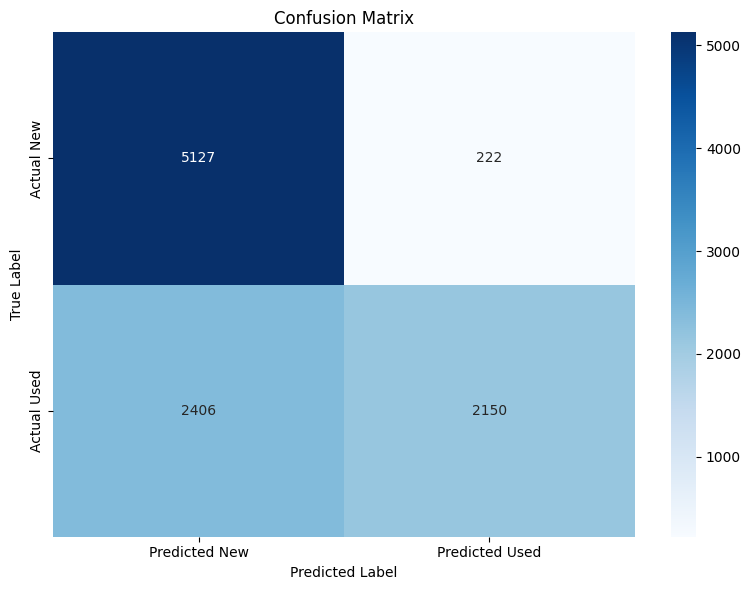

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

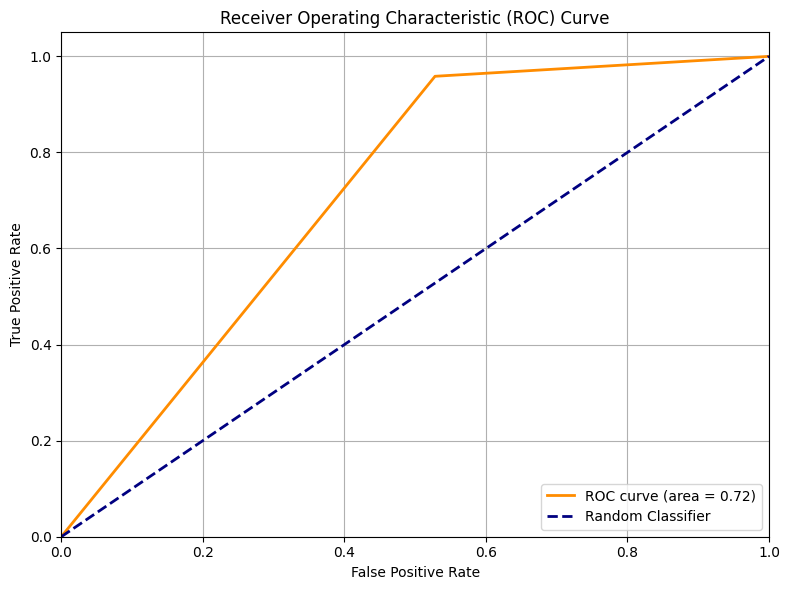

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [124]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [125]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.9584969153112731, 0.04150308468872686], [0...
metrics     {'new': {'precision': 0.680605336519315, 'reca...
roc_auc                                              0.715201
Name: 5, dtype: object

### Coefficients Importance

In [130]:
feature_names = X_train.columns

In [131]:
# Let's access the coefficients to verify what feature is more influential
coefficients = model.coef_[0]
intercept = model.intercept_[0] 

print("Model Intercept:", intercept)
print("\nCoefficients for each feature:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\n--- Features by Absolute Magnitude (Most Influential) ---")
# Create a DataFrame to sort by absolute coefficient magnitude
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coef_df)

Model Intercept: -0.6929335869890125

Coefficients for each feature:
accepts_mercadopago: 0.2103
automatic_relist: 2.4364
price_scaled: 0.0018
is_USD: 0.8070
free_tier: -3.1393
buying_mode_buy_it_now: 0.8888
buying_mode_classified: -0.8917
is_weekend: -0.2085
is_working_hours: 0.2137

--- Features by Absolute Magnitude (Most Influential) ---
                  Feature  Coefficient  Abs_Coefficient
4               free_tier    -3.139337         3.139337
1        automatic_relist     2.436413         2.436413
6  buying_mode_classified    -0.891730         0.891730
5  buying_mode_buy_it_now     0.888835         0.888835
3                  is_USD     0.807041         0.807041
8        is_working_hours     0.213657         0.213657
0     accepts_mercadopago     0.210295         0.210295
7              is_weekend    -0.208487         0.208487
2            price_scaled     0.001750         0.001750


**Features' Predictiveness**
1. free_tier                  0.485303 (#1)
1. automatic_relist           0.187453 (#2)
1. buying_mode_buy_it_now     0.099804 (#4)
1. accepts_mercadopago        0.092842 (#7)
1. buying_mode_classified     0.092842 (#3)
1. initial_quantity_scaled    0.071924
1. price_scaled               0.000968

## Analysis

**Key Takeaways:**

1. Model had similar results as before.
1. Notice how the coefficients of the remaining features have slightly changed. 

**Conclusions:**

* `initial_quantity_scaled` was indeed not contributing meaningfully to the model's actual predictive performance. Its large coefficient in the original model was likely a statistical artifact (e.g., related to multicollinearity), rather than a reflection of true predictive power.
* The model found that `free_tier` and `automatic_relist` are now the most prominent drivers of prediction, which aligns with them being the second and third most influential in your original model.

---
# 5º iteration - Regularization

In [ ]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [4]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [6]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [7]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [8]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
dtypes: bool(1), float64(3), int64(2), uint8(3)
memory usage: 3.7 MB


In [10]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [11]:
X_train.drop(columns=['price_scaled'], inplace=True)
X_test.drop(columns=['price_scaled'], inplace=True)

In [12]:
X_train.drop(columns=['is_USD'], inplace=True)
X_test.drop(columns=['is_USD'], inplace=True)

In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   free_tier               9905 non-null   bool   
 3   buying_mode_buy_it_now  9905 non-null   float64
 4   buying_mode_classified  9905 non-null   float64
 5   is_weekend              9905 non-null   int64  
 6   is_working_hours        9905 non-null   int64  
dtypes: bool(1), float64(2), int64(2), uint8(2)
memory usage: 338.7 KB


In [14]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [16]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [ ]:
history

## Model training

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# Define a range of C values to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a scorer for the metric you care about most (e.g., F1-score for 'used' class)
# Assuming 'used' is class 1 and 'new' is class 0
# You might need to adjust 'pos_label' based on your class encoding if 'used' is not 1
f1_scorer = make_scorer(f1_score, average='macro', pos_label=1)

grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
                           param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring=f1_scorer, # Score based on the F1 for 'used'
                           n_jobs=-1) # Use all available cores

grid_search.fit(X_train, y_train)

print(f"Best C value: {grid_search.best_params_['C']}")
print(f"Best F1-score for 'used' with best C: {grid_search.best_score_:.4f}")

# Access the best model
best_model = grid_search.best_estimator_

# Now evaluate this best_model on your test set

Best C value: 0.1
Best F1-score for 'used' with best C: 0.7037


In [19]:
# Initialize the Logistic Regression model
#model = LogisticRegression(class_weight='balanced', random_state=42)
model = LogisticRegression(class_weight='balanced', penalty='l2', C=0.1, solver='liblinear', random_state=42)
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [20]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


## Model evaluation

In [21]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [22]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

         new      0.681     0.958     0.796      5349
        used      0.906     0.472     0.621      4556

    accuracy                          0.735      9905
   macro avg      0.794     0.715     0.708      9905
weighted avg      0.784     0.735     0.715      9905



In [23]:
f1_score(y_test, y_pred,average='weighted')

0.7153503751627156

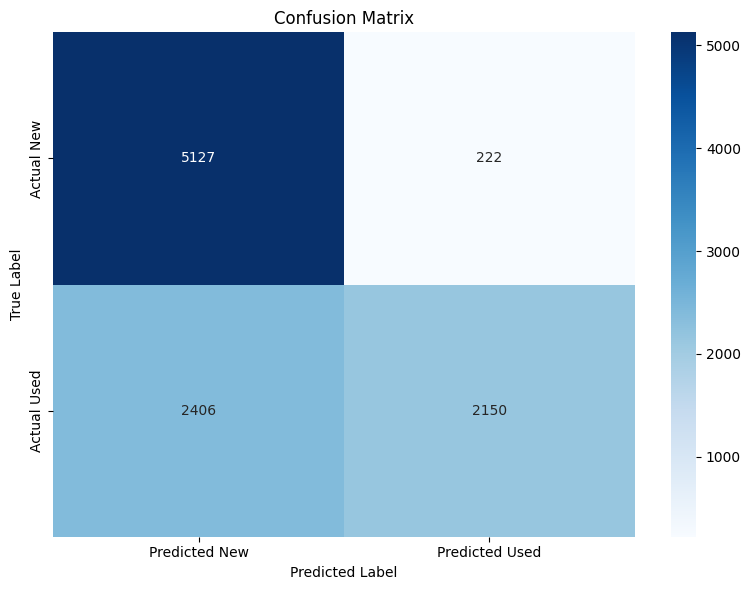

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

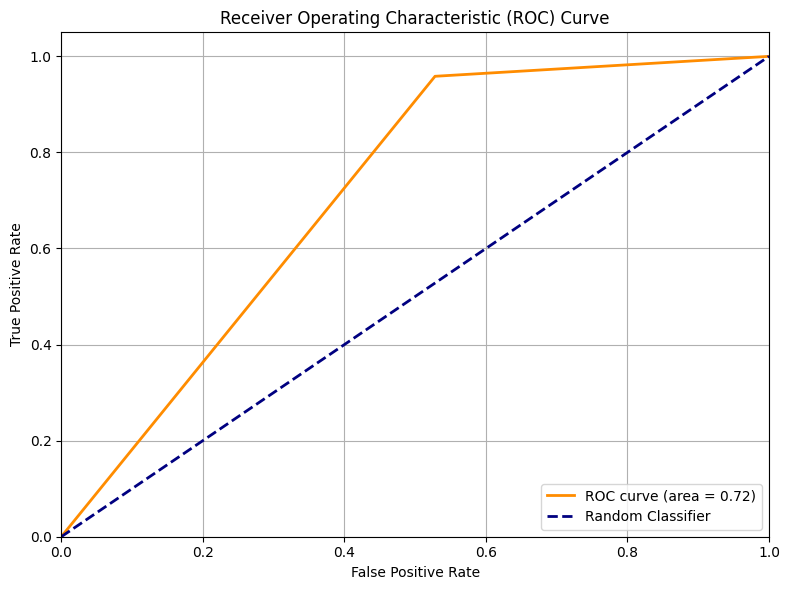

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [31]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [27]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.9584969153112731, 0.04150308468872686], [0...
metrics     {'new': {'precision': 0.680605336519315, 'reca...
roc_auc                                              0.715201
Name: 6, dtype: object

### Coefficients Importance

In [28]:
feature_names = X_train.columns

In [30]:
# Let's access the coefficients to verify what feature is more influential
coefficients = model.coef_[0]
intercept = model.intercept_[0] 

print("Model Intercept:", intercept)
print("\nCoefficients for each feature:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\n--- Features by Absolute Magnitude (Most Influential) ---")
# Create a DataFrame to sort by absolute coefficient magnitude
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coef_df)

Model Intercept: -0.5684123844419986

Coefficients for each feature:
accepts_mercadopago: 0.1754
automatic_relist: 2.3319
free_tier: -3.1167
buying_mode_buy_it_now: 0.8000
buying_mode_classified: -0.7438
is_weekend: -0.2084
is_working_hours: 0.2109

--- Features by Absolute Magnitude (Most Influential) ---
                  Feature  Coefficient  Abs_Coefficient
2               free_tier    -3.116681         3.116681
1        automatic_relist     2.331881         2.331881
3  buying_mode_buy_it_now     0.800023         0.800023
4  buying_mode_classified    -0.743798         0.743798
6        is_working_hours     0.210899         0.210899
5              is_weekend    -0.208427         0.208427
0     accepts_mercadopago     0.175385         0.175385


1. free_tier                  0.485303 (#1)
1. automatic_relist           0.187453 (#2)
1. buying_mode_buy_it_now     0.099804 (#3)
1. accepts_mercadopago        0.092842
1. buying_mode_classified     0.092842 (#4)
1. initial_quantity_scaled    0.071924
1. status_paused              0.067348
1. is_USD                     0.025116
1. status_not_yet_active      0.003110
1. price_scaled               0.000968

## Analysis

1. Model had similar results as before.
1. Notice how the coefficients of the remaining features have slightly changed.

**Conclusions:**

* Even when it's not impacting in model performance, we can see that applying L2 reg is penalizing even more `accepts_mercadopago`. However, this was detected to be more correlated with target that other features.

---
# 6º iteration - Categorical quantity

In [ ]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [45]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [46]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'is_USD',
       'free_tier', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'is_weekend', 'is_working_hours', 'quant_single_unit', 'quant_small'],
      dtype='object')

In [47]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [48]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [49]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
 9   quant_single_unit       89109 non-null  bool   
 10  quant_small             89109 non-null  bool   
dtypes: bool(3), float64(3), int64(2), uint8(3)
memory usage: 3.9 MB


In [51]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   price_scaled            9905 non-null   float64
 3   is_USD                  9905 non-null   uint8  
 4   free_tier               9905 non-null   bool   
 5   buying_mode_buy_it_now  9905 non-null   float64
 6   buying_mode_classified  9905 non-null   float64
 7   is_weekend              9905 non-null   int64  
 8   is_working_hours        9905 non-null   int64  
 9   quant_single_unit       9905 non-null   bool   
 10  quant_small             9905 non-null   bool   
dtypes: bool(3), float64(3), int64(2), uint8(3)
memory usage: 445.1 KB


In [54]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [ ]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [ ]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Model training

In [61]:
# Initialize the Logistic Regression model
#model = LogisticRegression(class_weight='balanced', random_state=42)
model = LogisticRegression(class_weight='balanced', penalty='l2', C=0.1, solver='liblinear', random_state=42)
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [62]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


## Model evaluation

In [63]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [64]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7424

Classification Report:
              precision    recall  f1-score   support

         new      0.965     0.543     0.695      5349
        used      0.645     0.977     0.777      4556

    accuracy                          0.742      9905
   macro avg      0.805     0.760     0.736      9905
weighted avg      0.818     0.742     0.733      9905



In [65]:
f1_score(y_test, y_pred,average='binary')

0.6946637951663077

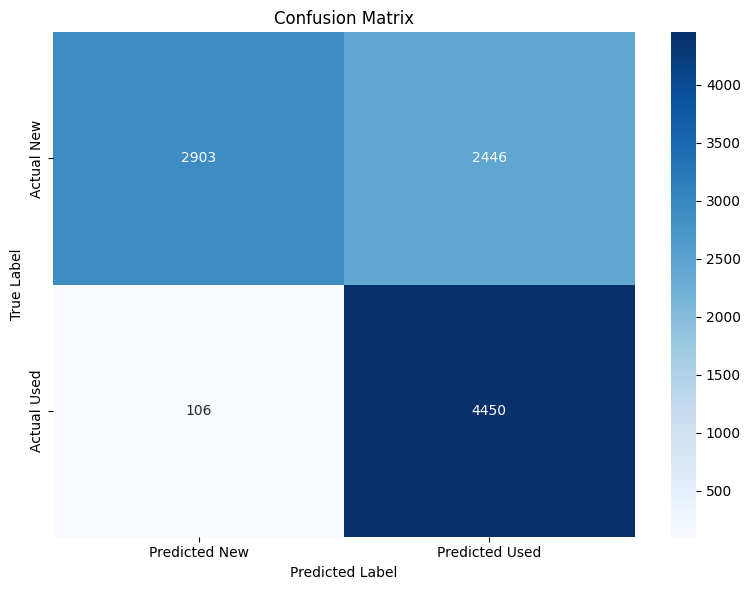

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

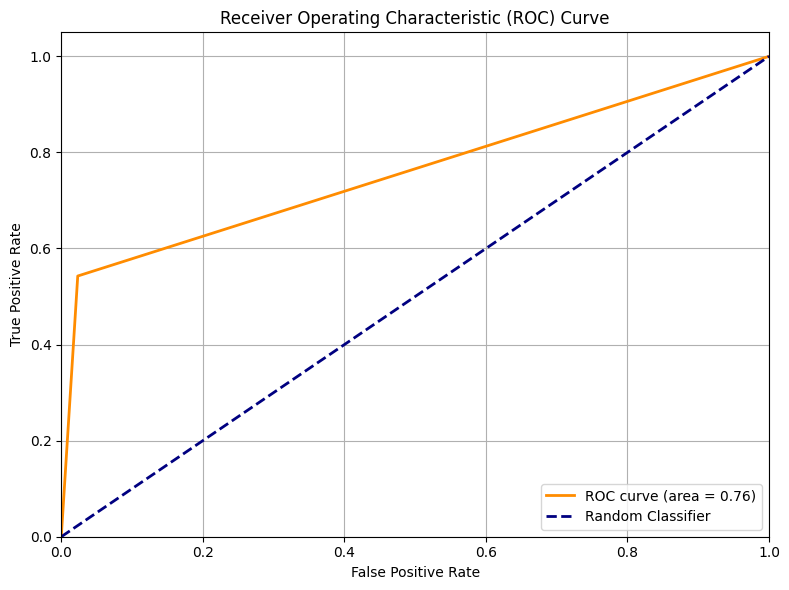

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [ ]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [ ]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.5427182650962796, 0.4572817349037203], [0....
metrics     {'new': {'precision': 0.9647723496178132, 'rec...
roc_auc                                              0.759726
Name: 6, dtype: object

### Coefficients Importance

In [ ]:
feature_names = X_train.columns

In [ ]:
# Let's access the coefficients to verify what feature is more influential
coefficients = model.coef_[0]
intercept = model.intercept_[0] 

print("Model Intercept:", intercept)
print("\nCoefficients for each feature:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\n--- Features by Absolute Magnitude (Most Influential) ---")
# Create a DataFrame to sort by absolute coefficient magnitude
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coef_df)

Model Intercept: 1.864626552270474

Coefficients for each feature:
accepts_mercadopago: 1.3194
automatic_relist: 1.5625
free_tier: -2.7130
buying_mode_buy_it_now: 0.2526
buying_mode_classified: 0.5088
is_weekend: -0.1405
is_working_hours: 0.1727
quant_single_unit: -3.6907
quant_small: -0.9940

--- Features by Absolute Magnitude (Most Influential) ---
                  Feature  Coefficient  Abs_Coefficient
7       quant_single_unit    -3.690727         3.690727
2               free_tier    -2.713048         2.713048
1        automatic_relist     1.562547         1.562547
0     accepts_mercadopago     1.319410         1.319410
8             quant_small    -0.994010         0.994010
4  buying_mode_classified     0.508783         0.508783
3  buying_mode_buy_it_now     0.252574         0.252574
6        is_working_hours     0.172680         0.172680
5              is_weekend    -0.140487         0.140487


1. free_tier                  0.485303 (#1)
1. automatic_relist           0.187453 (#2)
1. buying_mode_buy_it_now     0.099804 (#3)
1. accepts_mercadopago        0.092842
1. buying_mode_classified     0.092842 (#4)
1. initial_quantity_scaled    0.071924
1. status_paused              0.067348
1. is_USD                     0.025116
1. status_not_yet_active      0.003110
1. price_scaled               0.000968

## Analysis

1. Model had similar results as before.
1. Notice how the coefficients of the remaining features have slightly changed.
1. Now we moved to the other end, instead of FN we have FP.

**Conclusions:**

* Even when it's not impacting in model performance, we can see that applying L2 reg is penalizing even more `accepts_mercadopago`. However, this was detected to be more correlated with target that other features.

---
# 7º iteration - Synthetic features

In [3]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [4]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [5]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'is_USD',
       'free_tier', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'is_weekend', 'is_working_hours', 'has_parent_item', 'has_store',
       'high_ticket', 'quant_single_unit', 'quant_small'],
      dtype='object')

In [6]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [7]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [8]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
 9   has_parent_item         89109 non-null  bool   
 10  has_store               89109 non-null  bool   
 11  high_ticket             89109 non-null  bool   
 12  quant_single_unit       89109 non-null  bool   
 13  quant_small             89109 non-null  bool   
dtypes: bool(6), float64(3), int64(2), uint

In [10]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   price_scaled            9905 non-null   float64
 3   is_USD                  9905 non-null   uint8  
 4   free_tier               9905 non-null   bool   
 5   buying_mode_buy_it_now  9905 non-null   float64
 6   buying_mode_classified  9905 non-null   float64
 7   is_weekend              9905 non-null   int64  
 8   is_working_hours        9905 non-null   int64  
 9   has_parent_item         9905 non-null   bool   
 10  has_store               9905 non-null   bool   
 11  high_ticket             9905 non-null   bool   
 12  quant_single_unit       9905 non-null   bool   
 13  quant_small             9905 non-null   bool   
dtypes: bool(6), float64(3), int64(2), uint8(

In [12]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [13]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [14]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",NaN,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Model training

In [15]:
# Initialize the Logistic Regression model
#model = LogisticRegression(class_weight='balanced', random_state=42)
model = LogisticRegression(class_weight='balanced', penalty='l2', C=0.1, solver='liblinear', random_state=42)
history.at[index, 'model'] = model.__class__.__name__ # for logging

In [16]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...


Model training complete.


## Model evaluation

In [17]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [18]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7990

Classification Report:
              precision    recall  f1-score   support

         new      0.885     0.722     0.795      5349
        used      0.731     0.890     0.803      4556

    accuracy                          0.799      9905
   macro avg      0.808     0.806     0.799      9905
weighted avg      0.814     0.799     0.799      9905



In [20]:
f1_score(y_test, y_pred,average='binary')

0.7950169875424689

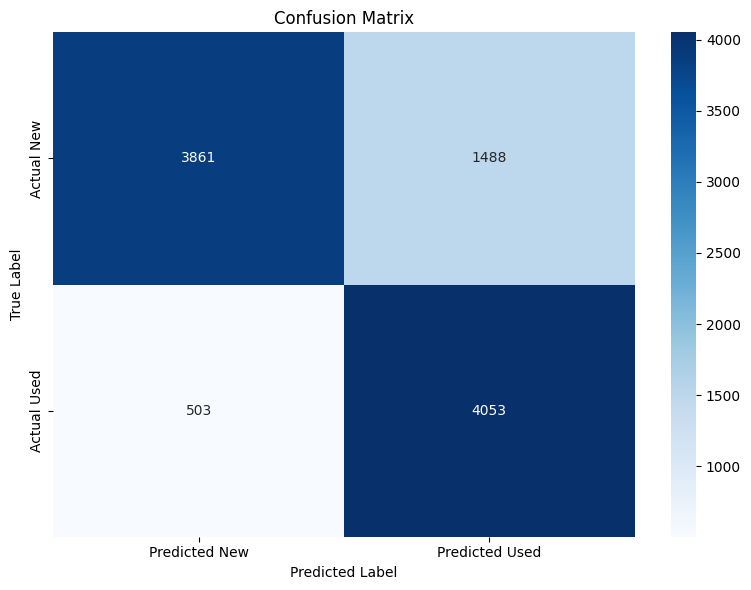

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

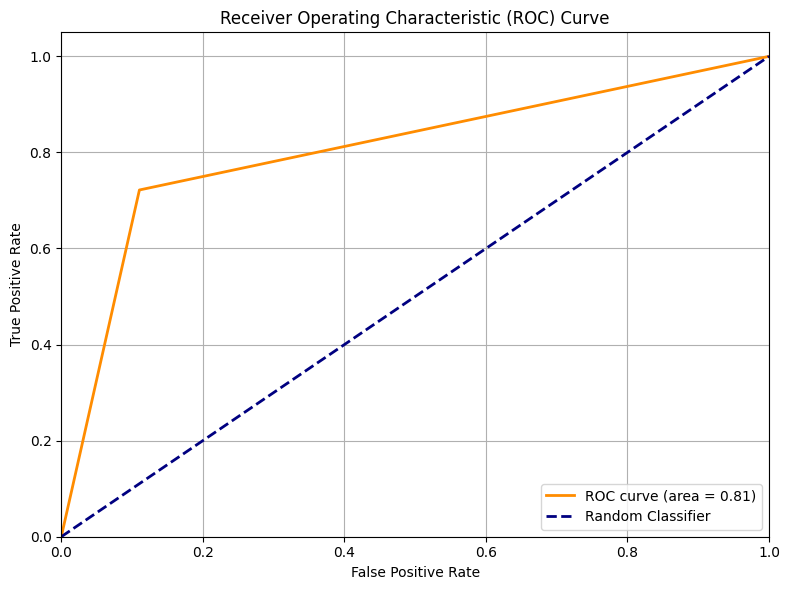

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [23]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [24]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                      LogisticRegression
items                          {'train': 89109, 'test': 9905}
cm          [[0.7218171620863713, 0.2781828379136287], [0....
metrics     {'new': {'precision': 0.8847387717690193, 'rec...
roc_auc                                              0.805707
Name: 7, dtype: object

### Coefficients Importance

In [25]:
feature_names = X_train.columns

In [26]:
# Let's access the coefficients to verify what feature is more influential
coefficients = model.coef_[0]
intercept = model.intercept_[0] 

print("Model Intercept:", intercept)
print("\nCoefficients for each feature:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\n--- Features by Absolute Magnitude (Most Influential) ---")
# Create a DataFrame to sort by absolute coefficient magnitude
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coef_df)

Model Intercept: 1.5785301610053846

Coefficients for each feature:
accepts_mercadopago: 1.9132
automatic_relist: 1.3988
price_scaled: -0.0103
is_USD: 0.6663
free_tier: -3.1383
buying_mode_buy_it_now: 0.2128
buying_mode_classified: -0.3346
is_weekend: -0.1175
is_working_hours: 0.1724
has_parent_item: -0.7608
has_store: 0.0393
high_ticket: 1.0599
quant_single_unit: -3.5038
quant_small: -0.7997

--- Features by Absolute Magnitude (Most Influential) ---
                   Feature  Coefficient  Abs_Coefficient
12       quant_single_unit    -3.503841         3.503841
4                free_tier    -3.138295         3.138295
0      accepts_mercadopago     1.913174         1.913174
1         automatic_relist     1.398815         1.398815
11             high_ticket     1.059936         1.059936
13             quant_small    -0.799689         0.799689
9          has_parent_item    -0.760776         0.760776
3                   is_USD     0.666286         0.666286
6   buying_mode_classified    -0

1. free_tier                  0.485303 (#1)
1. automatic_relist           0.187453 (#2)
1. buying_mode_buy_it_now     0.099804 (#3)
1. accepts_mercadopago        0.092842
1. buying_mode_classified     0.092842 (#4)
1. initial_quantity_scaled    0.071924
1. status_paused              0.067348
1. is_USD                     0.025116
1. status_not_yet_active      0.003110
1. price_scaled               0.000968

## Analysis

1. Model performance has improved significantly.
1. Now `accepts_mercadopago` gets relevant as expected.
1. `price_scaled`remains without much contribution.

**Conclusions:**
* Now that price data is contained as categorical, `price_scaled` could be removed.

---
# 8º iteration - Random Forest

In [3]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [4]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [5]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'is_USD',
       'free_tier', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'is_weekend', 'is_working_hours', 'has_parent_item', 'has_store',
       'high_ticket', 'quant_single_unit', 'quant_small'],
      dtype='object')

In [5]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [7]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [8]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
 9   has_parent_item         89109 non-null  bool   
 10  has_store               89109 non-null  bool   
 11  high_ticket             89109 non-null  bool   
 12  quant_single_unit       89109 non-null  bool   
 13  quant_small             89109 non-null  bool   
dtypes: bool(6), float64(3), int64(2), uint

In [10]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   is_USD                  9905 non-null   uint8  
 3   free_tier               9905 non-null   bool   
 4   buying_mode_buy_it_now  9905 non-null   float64
 5   buying_mode_classified  9905 non-null   float64
 6   is_weekend              9905 non-null   int64  
 7   is_working_hours        9905 non-null   int64  
 8   has_parent_item         9905 non-null   bool   
 9   has_store               9905 non-null   bool   
 10  high_ticket             9905 non-null   bool   
 11  quant_single_unit       9905 non-null   bool   
 12  quant_small             9905 non-null   bool   
dtypes: bool(6), float64(2), int64(2), uint8(3)
memory usage: 396.7 KB


In [12]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [13]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [14]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",NaN,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [ ]:
# Train the model using the scaled training data
print("Training the Random Forest model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


## Model evaluation

In [17]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [18]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8219

Classification Report:
              precision    recall  f1-score   support

         new      0.880     0.777     0.825      5349
        used      0.769     0.875     0.819      4556

    accuracy                          0.822      9905
   macro avg      0.824     0.826     0.822      9905
weighted avg      0.829     0.822     0.822      9905



In [ ]:
f1_score(y_test, y_pred,average='binary')

0.8248610007942812

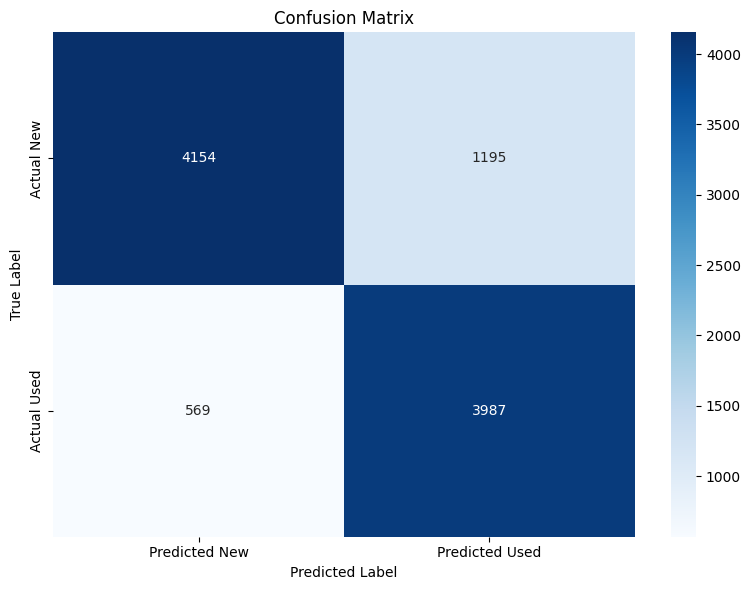

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

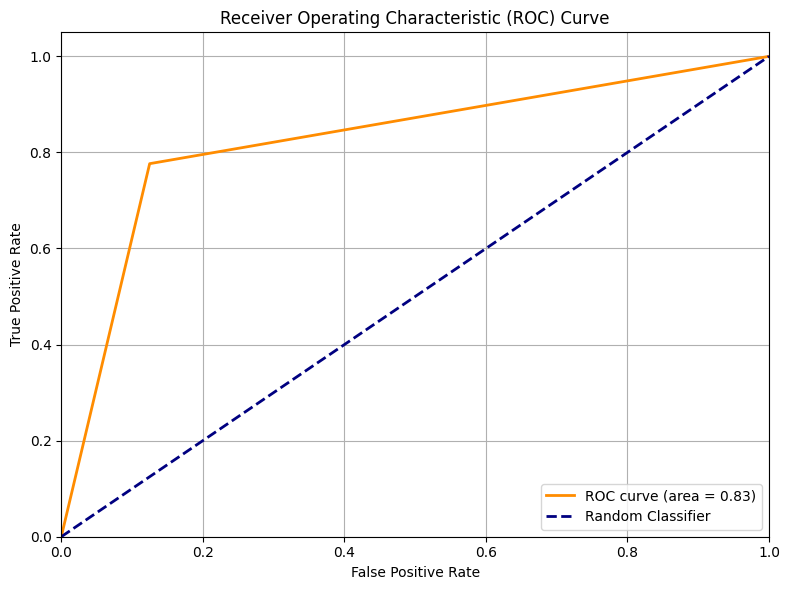

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [22]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [23]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                  RandomForestClassifier
items                          {'train': 89109, 'test': 9905}
cm          [[0.7765937558422135, 0.2234062441577865], [0....
metrics     {'new': {'precision': 0.8795257251746771, 'rec...
roc_auc                                              0.825852
Name: 7, dtype: object

## Analysis

1. Model performance has improved significantly over all metrics.
1. Better balance between precision and recall for both classes (reduced FP & FN).

**Conclusions:**
* The **Random Forest model is generally superior** for this classification task.

---
# 9º iteration - Random Forest + Random Search

In [13]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [14]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [15]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'is_USD',
       'free_tier', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'is_weekend', 'is_working_hours', 'has_parent_item', 'has_store',
       'high_ticket', 'quant_single_unit', 'quant_small'],
      dtype='object')

In [16]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [17]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [18]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
 9   has_parent_item         89109 non-null  bool   
 10  has_store               89109 non-null  bool   
 11  high_ticket             89109 non-null  bool   
 12  quant_single_unit       89109 non-null  bool   
 13  quant_small             89109 non-null  bool   
dtypes: bool(6), float64(3), int64(2), uint

In [20]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   price_scaled            9905 non-null   float64
 3   is_USD                  9905 non-null   uint8  
 4   free_tier               9905 non-null   bool   
 5   buying_mode_buy_it_now  9905 non-null   float64
 6   buying_mode_classified  9905 non-null   float64
 7   is_weekend              9905 non-null   int64  
 8   is_working_hours        9905 non-null   int64  
 9   has_parent_item         9905 non-null   bool   
 10  has_store               9905 non-null   bool   
 11  high_ticket             9905 non-null   bool   
 12  quant_single_unit       9905 non-null   bool   
 13  quant_small             9905 non-null   bool   
dtypes: bool(6), float64(3), int64(2), uint8(

In [22]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [23]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [24]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7765937558422135, 0.2234062441577865], [0....","{'new': {'precision': 0.8795257251746771, 'rec...",0.825852
8,"{'train': {'feat': ['accepts_mercadopago', 'au...",NaN,"{'train': 89109, 'test': 9905}",NaN,NaN,NaN


## Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter distribution
param_distributions = {
    'n_estimators': np.arange(100, 1501, 100), # Search from 100 to 1500 in steps of 100
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Implement RandomizedSearchCV ---
# n_iter: Number of parameter settings that are sampled.
#         A higher number means a more exhaustive search but takes longer.
# cv: Number of folds for cross-validation.
# scoring: Metric to optimize (e.g., 'accuracy', 'f1', 'roc_auc').
#          'f1_weighted' or 'f1_macro' are good for imbalanced datasets.
# verbose: Controls the verbosity of the output.
# n_jobs: Number of jobs to run in parallel (-1 means using all available processors).
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_distributions,
                                   n_iter=10, # Number of random combinations to try
                                   cv=5,      # 5-fold cross-validation
                                   scoring='f1_weighted', # Or 'f1_macro', 'accuracy', 'roc_auc'
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

print("Starting Random Search for n_estimators...")
random_search.fit(X_train, y_train)
print("Random Search complete.")

# Get the best parameters and best score
print(f"\nBest n_estimators found: {random_search.best_params_['n_estimators']}")
print(f"Best cross-validation score (f1_weighted): {random_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("\n--- Evaluation of Best Model on Test Set ---")
overall_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {overall_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Starting Random Search for n_estimators...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  59.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  59.4s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  59.6s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  59.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 1.0min
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  14.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  14.6s
[CV] END criterion=gini, max_depth=None, min_samples_lea

In [ ]:
random_search.best_params_

{'n_estimators': np.int64(1100),
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': None,
 'criterion': 'gini'}

## Model training

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=1100,
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=None,
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [28]:
# Train the model using the scaled training data
print("Training the Random Forest model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


## Model evaluation

In [27]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [29]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8298

Classification Report:
              precision    recall  f1-score   support

         new      0.880     0.793     0.834      5349
        used      0.782     0.873     0.825      4556

    accuracy                          0.830      9905
   macro avg      0.831     0.833     0.830      9905
weighted avg      0.835     0.830     0.830      9905



In [32]:
f1_score(y_test, y_pred,average='binary')

0.8342508847817538

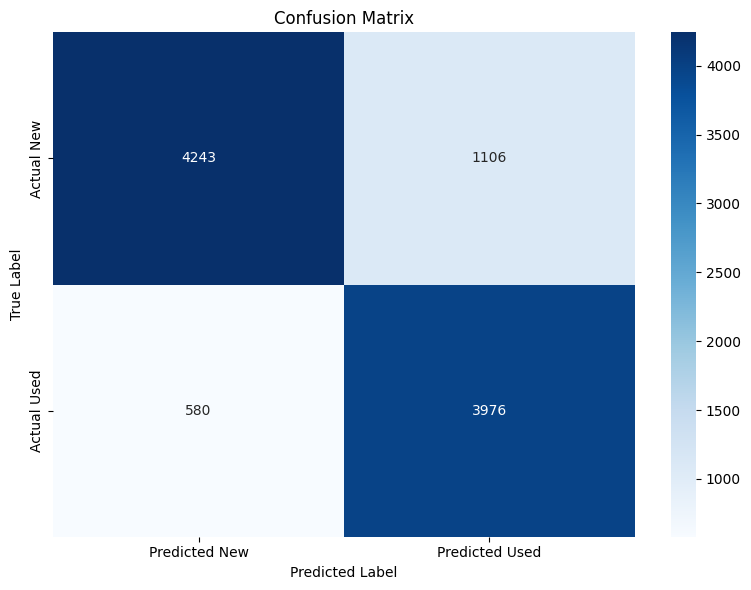

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

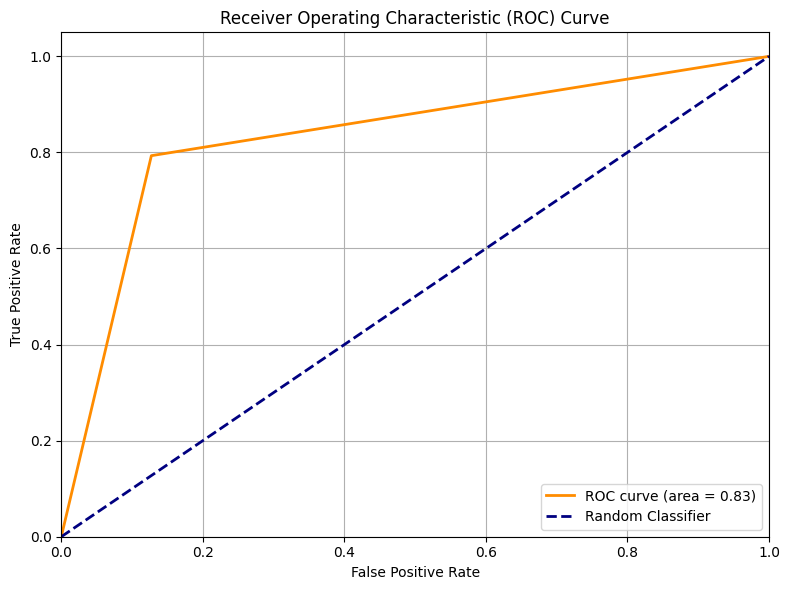

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [35]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [36]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                  RandomForestClassifier
items                          {'train': 89109, 'test': 9905}
cm          [[0.7932323798840905, 0.20676762011590952], [0...
metrics     {'new': {'precision': 0.8797428986108231, 'rec...
roc_auc                                              0.832964
Name: 8, dtype: object

## Analysis

1. Appliying hyperparameters optimization, Random Search improved accuracy 1%.

**Conclusions:**
* Applying hyperparameter tuning could offer some improvement. A good idea is to use `accuracy` as reference metric for optimization.

---
# 10º iteration - XGBoost

In [38]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [ ]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [39]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'is_USD',
       'free_tier', 'buying_mode_buy_it_now', 'buying_mode_classified',
       'is_weekend', 'is_working_hours', 'has_parent_item', 'has_store',
       'high_ticket', 'quant_single_unit', 'quant_small'],
      dtype='object')

In [40]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [ ]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [ ]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   automatic_relist        89109 non-null  uint8  
 2   price_scaled            89109 non-null  float64
 3   is_USD                  89109 non-null  uint8  
 4   free_tier               89109 non-null  bool   
 5   buying_mode_buy_it_now  89109 non-null  float64
 6   buying_mode_classified  89109 non-null  float64
 7   is_weekend              89109 non-null  int64  
 8   is_working_hours        89109 non-null  int64  
 9   has_parent_item         89109 non-null  bool   
 10  has_store               89109 non-null  bool   
 11  high_ticket             89109 non-null  bool   
 12  quant_single_unit       89109 non-null  bool   
 13  quant_small             89109 non-null  bool   
dtypes: bool(6), float64(3), int64(2), uint

In [ ]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   automatic_relist        9905 non-null   uint8  
 2   price_scaled            9905 non-null   float64
 3   is_USD                  9905 non-null   uint8  
 4   free_tier               9905 non-null   bool   
 5   buying_mode_buy_it_now  9905 non-null   float64
 6   buying_mode_classified  9905 non-null   float64
 7   is_weekend              9905 non-null   int64  
 8   is_working_hours        9905 non-null   int64  
 9   has_parent_item         9905 non-null   bool   
 10  has_store               9905 non-null   bool   
 11  high_ticket             9905 non-null   bool   
 12  quant_single_unit       9905 non-null   bool   
 13  quant_small             9905 non-null   bool   
dtypes: bool(6), float64(3), int64(2), uint8(

In [ ]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [45]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [46]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7765937558422135, 0.2234062441577865], [0....","{'new': {'precision': 0.8795257251746771, 'rec...",0.825852
8,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7932323798840905, 0.20676762011590952], [0...","{'new': {'precision': 0.8797428986108231, 'rec...",0.832964


## Random Search

In [57]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# Define the parameter distribution
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # Step size shrinkage
    'max_depth': [3, 4, 5, 6, 7, 8],            # Maximum depth of a tree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],     # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],           # Minimum loss reduction for a split
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],      # L1 regularization term
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]      # L2 regularization term
}

# Implement RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled.
#         A higher number means a more exhaustive search but takes longer.
# cv: Number of folds for cross-validation.
# scoring: Metric to optimize (e.g., 'accuracy', 'f1', 'roc_auc').
#          'f1_weighted' or 'f1_macro' are good for imbalanced datasets.
# verbose: Controls the verbosity of the output.
# n_jobs: Number of jobs to run in parallel (-1 means using all available processors).
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_distributions,
                                   n_iter=50, # Number of random combinations to try
                                   cv=5,      # 5-fold cross-validation
                                   scoring='accuracy', # Or 'f1_macro', 'accuracy', 'roc_auc'
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

print("Starting Random Search for n_estimators...")
random_search.fit(X_train, y_train)
print("Random Search complete.")

# Get the best parameters and best score
print(f"\nBest n_estimators found: {random_search.best_params_['n_estimators']}")
print(f"Best cross-validation score (f1_weighted): {random_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("\n--- Evaluation of Best Model on Test Set ---")
overall_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {overall_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Starting Random Search for n_estimators...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   5.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   5.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   5.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   5.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   5.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=1000, re

In [58]:
random_search.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.001,
 'reg_alpha': 0.01,
 'n_estimators': np.int64(800),
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.8}

## Model training

In [60]:
import xgboost as xgb

# Implement the XGBoost Classifier
# Initialize the XGBoost model
# Key parameters to consider (and often tune):
#   - n_estimators: Number of boosting rounds (trees). Similar to n_estimators in Random Forest.
#   - learning_rate: Shrinks the contribution of each tree. Prevents overfitting.
#   - max_depth: Maximum depth of a tree.
#   - subsample: Subsample ratio of the training instance.
#   - colsample_bytree: Subsample ratio of columns when constructing each tree.
#   - gamma: Minimum loss reduction required to make a further partition on a leaf node.
#   - reg_alpha (L1 regularization) and reg_lambda (L2 regularization): Regularization terms.
#   - objective: The learning objective (e.g., 'binary:logistic' for binary classification).
#   - eval_metric: The metric used for validation data.

model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification with probability output
    eval_metric='logloss',        # Metric used for evaluation during training
    # Tuned parameters:
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.01,   # L1 regularization
    reg_lambda=0.001, # L2 regularization
    random_state=42
)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [62]:
# Train the model using the scaled training data
print("Training XGBoost model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training XGBoost model...
Model training complete.


## Model evaluation

In [63]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [64]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8298

Classification Report:
              precision    recall  f1-score   support

         new      0.843     0.841     0.842      5349
        used      0.814     0.817     0.815      4556

    accuracy                          0.830      9905
   macro avg      0.829     0.829     0.829      9905
weighted avg      0.830     0.830     0.830      9905



In [65]:
f1_score(y_test, y_pred,average='binary')

0.8421643886912563

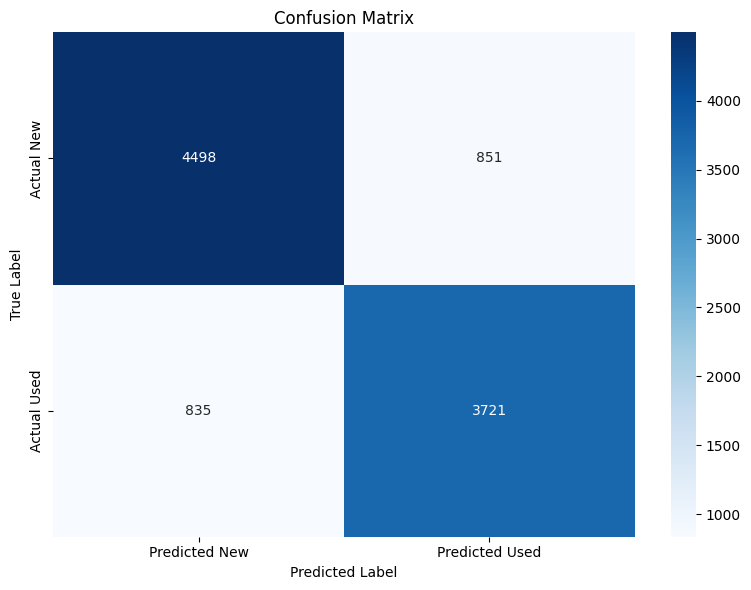

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

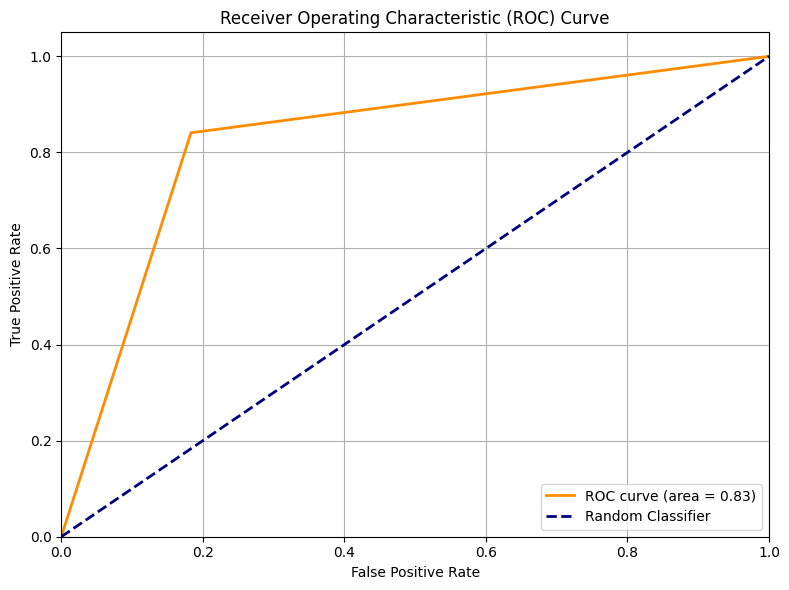

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [68]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [69]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                           XGBClassifier
items                          {'train': 89109, 'test': 9905}
cm          [[0.840904842026547, 0.15909515797345297], [0....
metrics     {'new': {'precision': 0.8434277142321395, 'rec...
roc_auc                                              0.828815
Name: 9, dtype: object

## Analysis

1. Using XGBoost, model reached same accuracy but with better F1-score.
1. Better trade-off between precision-recall.

**Conclusions:**
* Given the virtually identical overall accuracy and average F1-scores, both models are performing at a very similar level. The main difference lies in their precision-recall trade-off for each specific class:
    * **XGBoost** seems to offer a slightly more balanced performance across precision and recall for both classes (e.g., F1-score of 0.84 for class '1' and 0.82 for class '0').
    * **Random Forest** leans towards higher recall for the minority class ('used') while maintaining very high precision for the majority class ('new').

---
# 11º iteration - Automatic Features Selection (chi-cuadrado + RFE)

In [3]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [4]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



For this experiment, every available feature and synthetics developed during iterations were included (discarding only IDs and tags). The idea is to automatically verify if a different combination of features exists – beyond the one created manually – that could improve model performance.

In [5]:
X_train.columns

Index(['price', 'accepts_mercadopago', 'automatic_relist', 'stop_time',
       'initial_quantity', 'start_time', 'price_scaled', 'is_USD',
       'listing_type_id_free', 'listing_type_id_gold',
       'listing_type_id_gold_premium', 'listing_type_id_gold_pro',
       'listing_type_id_gold_special', 'listing_type_id_silver', 'is_weekend',
       'is_working_hours', 'quant_single_unit', 'buying_mode_buy_it_now',
       'buying_mode_classified', 'free_tier', 'time_created', 'day_of_week',
       'quant_small', 'has_parent_item', 'has_store', 'high_ticket',
       'duration', 'is_single_unit', 'status_not_yet_active', 'status_paused'],
      dtype='object')

In [6]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [7]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [8]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         89109 non-null  float64
 1   accepts_mercadopago           89109 non-null  uint8  
 2   automatic_relist              89109 non-null  uint8  
 3   stop_time                     89109 non-null  int64  
 4   initial_quantity              89109 non-null  int64  
 5   start_time                    89109 non-null  int64  
 6   price_scaled                  89109 non-null  float64
 7   is_USD                        89109 non-null  uint8  
 8   listing_type_id_free          89109 non-null  float64
 9   listing_type_id_gold          89109 non-null  float64
 10  listing_type_id_gold_premium  89109 non-null  float64
 11  listing_type_id_gold_pro      89109 non-null  float64
 12  listing_type_id_gold_special  89109 non-null  float64
 13  l

In [10]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         9905 non-null   float64
 1   accepts_mercadopago           9905 non-null   uint8  
 2   automatic_relist              9905 non-null   uint8  
 3   stop_time                     9905 non-null   int64  
 4   initial_quantity              9905 non-null   int64  
 5   start_time                    9905 non-null   int64  
 6   price_scaled                  9905 non-null   float64
 7   is_USD                        9905 non-null   uint8  
 8   listing_type_id_free          9905 non-null   float64
 9   listing_type_id_gold          9905 non-null   float64
 10  listing_type_id_gold_premium  9905 non-null   float64
 11  listing_type_id_gold_pro      9905 non-null   float64
 12  listing_type_id_gold_special  9905 non-null   float64
 13  lis

In [12]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [69]:
# Keep tracking of every feature
history.at[index, 'items'] = size
#features['train']['feat'] = X_train.columns.to_list()
features['train']['feat'] = X_train.columns[rfe.support_].tolist()
#features['test']['feat'] = X_test.columns.to_list()
features['train']['feat'] = X_train.columns[rfe.support_].tolist()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [68]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7765937558422135, 0.2234062441577865], [0....","{'new': {'precision': 0.8795257251746771, 'rec...",0.825852
8,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7932323798840905, 0.20676762011590952], [0...","{'new': {'precision': 0.8797428986108231, 'rec...",0.832964


## Recursive Feature Selection (RFE)

In [15]:
import xgboost as xgb

# Implement the XGBoost Classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification with probability output
    eval_metric='logloss',        # Metric used for evaluation during training
    # Tuned parameters:
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.01,   # L1 regularization
    reg_lambda=0.001, # L2 regularization
    random_state=42
)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

print("Executing chi-squared test…")
# 1. Chi-squared test to select relevant categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns
selected_features = []
for feature in categorical_features:
    crosstab = pd.crosstab(X_train[feature], y_train)
    chi2, p, _, _ = chi2_contingency(crosstab)
    if p < 0.05:
        selected_features.append(feature)

# 2. Encode selected categorical features
encoder = LabelEncoder()
for feature in selected_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])

# 3. Recursively eliminate irrelevant features
print("Applying RFE…")
rfe = RFE(model, n_features_to_select=10) 
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Executing chi-squared test…
Applying RFE…


In [60]:
X_train.columns[rfe.support_].tolist()

['accepts_mercadopago',
 'initial_quantity',
 'price_scaled',
 'listing_type_id_free',
 'quant_single_unit',
 'buying_mode_buy_it_now',
 'buying_mode_classified',
 'free_tier',
 'has_parent_item',
 'duration']

In [53]:
# Get features names
selected_feature_names = X_train.columns[rfe.support_].tolist()

feature_rankings = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

In [ ]:
# Selected Features
feature_rankings[feature_rankings['Selected']==True]

,Feature,Ranking,Selected
1,accepts_mercadopago,1,True
4,initial_quantity,1,True
6,price_scaled,1,True
8,listing_type_id_free,1,True
19,free_tier,1,True
18,buying_mode_classified,1,True
17,buying_mode_buy_it_now,1,True
16,quant_single_unit,1,True
26,duration,1,True
23,has_parent_item,1,True


**Manual Feature Selection (previous)** - bold features were already chosen by RFE
- **'accepts_mercadopago'**
- 'automatic_relist',
- **'price_scaled'**
- 'is_USD',
- **'free_tier'** = listing_type_id_free
- **'buying_mode_buy_it_now'**
- **'buying_mode_classified'**
- 'is_weekend', 
- 'is_working_hours',
- **'has_parent_item'**
- 'has_store',
- 'high_ticket',
- **'quant_single_unit'** <-> initial_quantity
- 'quant_small'

**New RFE selection:**
- duration

2 pairs of the selected features were similar to each other. That indicates that it may be reduced even more, down to 8 features.

In [ ]:
# Discarded Features
feature_rankings[feature_rankings['Selected']==False]

,Feature,Ranking,Selected
0,price,2,False
13,listing_type_id_silver,3,False
2,automatic_relist,4,False
12,listing_type_id_gold_special,5,False
27,is_single_unit,6,False
29,status_paused,7,False
9,listing_type_id_gold,8,False
7,is_USD,9,False
25,high_ticket,10,False
22,quant_small,11,False


As we can verify, the top next features in ranking are already represented in our dataset by other derived or highly correlated features. So no improvement is expected by including them.

## Model training

In [28]:
# Train the model using the scaled training data
print("Training XGBoost model...")
model.fit(X_train_rfe, y_train)
print("Model training complete.")
print(f"Recall en el conjunto de prueba: {model.score(X_test_rfe, y_test)}")

Training XGBoost model...
Model training complete.
Recall en el conjunto de prueba: 0.8497728419989904


## Model evaluation

In [29]:
# Predict on the scaled test data
y_pred = model.predict(X_test_rfe)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test_rfe) 

In [30]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8498

Classification Report:
              precision    recall  f1-score   support

         new      0.873     0.845     0.859      5349
        used      0.824     0.856     0.840      4556

    accuracy                          0.850      9905
   macro avg      0.849     0.850     0.849      9905
weighted avg      0.851     0.850     0.850      9905



In [34]:
f1_score(y_test, y_pred,average='binary')

0.8586088939566705

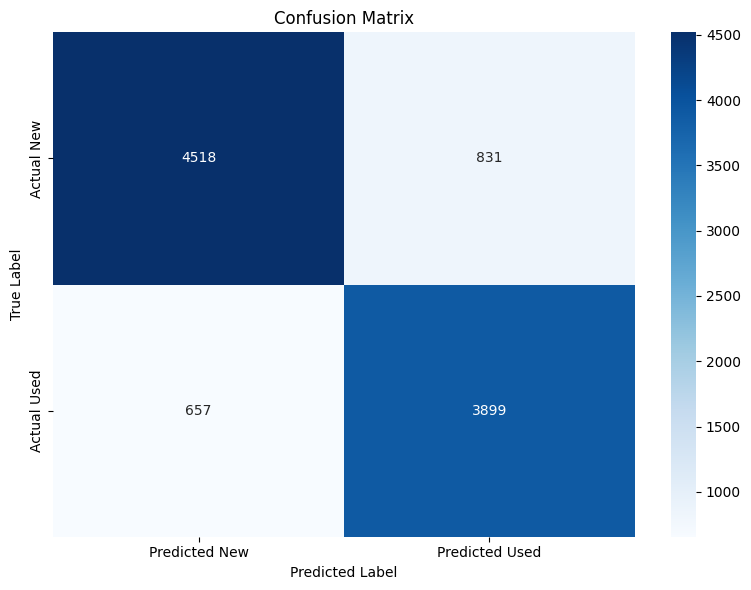

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

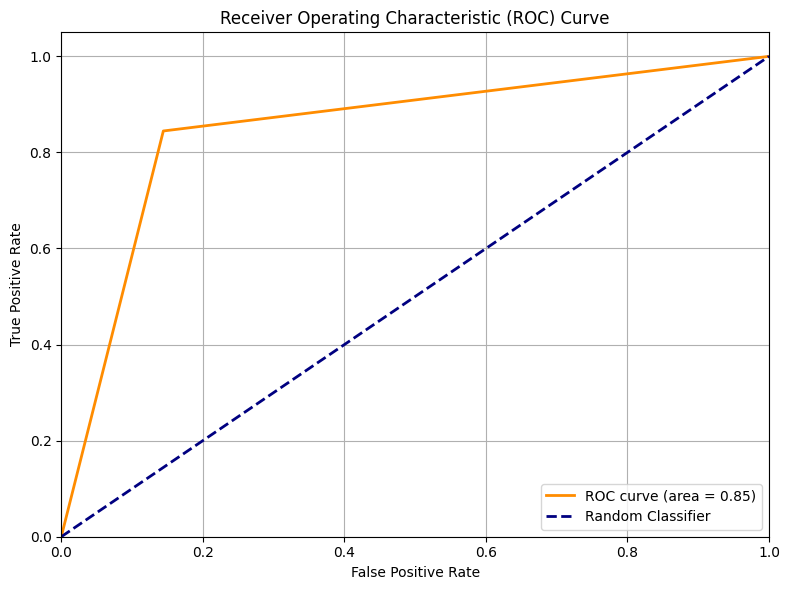

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [70]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [71]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'in...
model                                           XGBClassifier
items                          {'train': 89109, 'test': 9905}
cm          [[0.8446438586651711, 0.15535614133482895], [0...
metrics     {'new': {'precision': 0.8730434782608696, 'rec...
roc_auc                                              0.850219
Name: 10, dtype: object

## New RFE iteration

In [ ]:
# Taking out manually similar features (both selected)
filter_out=['initial_quantity', 'listing_type_id_free','quant_single_unit']
X_train.drop(columns=filter_out,inplace=True)
X_test.drop(columns=filter_out,inplace=True)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

print("Executing chi-squared test…")
# 1. Chi-squared test to select relevant categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns
selected_features = []
for feature in categorical_features:
    crosstab = pd.crosstab(X_train[feature], y_train)
    chi2, p, _, _ = chi2_contingency(crosstab)
    if p < 0.05:
        selected_features.append(feature)

# 2. Encode selected categorical features
encoder = LabelEncoder()
for feature in selected_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])

# 3. Recursively eliminate irrelevant features
print("Applying RFE…")
rfe = RFE(model, n_features_to_select=8) 
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Executing chi-squared test…
Applying RFE…


In [86]:
X_train.columns[rfe.support_].tolist()

['accepts_mercadopago',
 'buying_mode_buy_it_now',
 'buying_mode_classified',
 'free_tier',
 'quant_small',
 'has_parent_item',
 'duration',
 'is_single_unit']

In [87]:
# Get features names
selected_feature_names = X_train.columns[rfe.support_].tolist()

feature_rankings = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

In [88]:
# Selected Features
feature_rankings[feature_rankings['Selected']==True]

,Feature,Ranking,Selected
1,accepts_mercadopago,1,True
14,buying_mode_buy_it_now,1,True
15,buying_mode_classified,1,True
24,is_single_unit,1,True
20,has_parent_item,1,True
23,duration,1,True
19,quant_small,1,True
16,free_tier,1,True


In [89]:
# Discarded Features
feature_rankings[feature_rankings['Selected']==False]

,Feature,Ranking,Selected
5,price_scaled,2,False
2,automatic_relist,3,False
0,price,4,False
11,listing_type_id_silver,5,False
10,listing_type_id_gold_special,6,False
26,status_paused,7,False
7,listing_type_id_gold,8,False
6,is_USD,9,False
8,listing_type_id_gold_premium,10,False
4,start_time,11,False


## Analysis

**Manual Feature Selection (previous)** - bold features were already chosen by RFE
- **'accepts_mercadopago'**
- 'automatic_relist',
- **'price_scaled'**
- 'is_USD',
- **'free_tier'**
- **'buying_mode_buy_it_now'**
- **'buying_mode_classified'**
- 'is_weekend', 
- 'is_working_hours',
- **'has_parent_item'**
- 'has_store',
- 'high_ticket',
- **'quant_single_unit'**
- ***'quant_small'***

**New RFE selection:**
- duration

***Potential selection:***
- automatic_relist *(top-ranking in discarded list)*

---
# 12º iteration - Including RFE discoveries

In [3]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [93]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



Different combinatios of the available features were tested and finally selected the mix with the best performance.

- **Highest:** ['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'duration',
       'has_parent_item', 'quant_single_unit']
- **Mid:** ['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'duration',
       'high_ticket', 'has_parent_item', 'quant_single_unit', 'quant_small']
- **Lower:** ['accepts_mercadopago', 'price_scaled', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'duration',
       'has_parent_item', 'quant_single_unit']

In [ ]:
# Taking out manually similar features (both selected)
filter_out=['high_ticket', 'quant_small']

In [96]:
# Taking out manually similar features (both selected)
#filter_out=['initial_quantity', 'listing_type_id_free','quant_single_unit']
X_train.drop(columns=filter_out,inplace=True)
X_test.drop(columns=filter_out,inplace=True)

In [59]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'duration',
       'has_parent_item', 'quant_single_unit'],
      dtype='object')

In [60]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [36]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [37]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     89109 non-null  uint8  
 1   price_scaled            89109 non-null  float64
 2   free_tier               89109 non-null  bool   
 3   buying_mode_buy_it_now  89109 non-null  float64
 4   buying_mode_classified  89109 non-null  float64
 5   duration                89109 non-null  int64  
 6   has_parent_item         89109 non-null  bool   
 7   quant_single_unit       89109 non-null  bool   
dtypes: bool(3), float64(3), int64(1), uint8(1)
memory usage: 3.1 MB


In [39]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accepts_mercadopago     9905 non-null   uint8  
 1   price_scaled            9905 non-null   float64
 2   free_tier               9905 non-null   bool   
 3   buying_mode_buy_it_now  9905 non-null   float64
 4   buying_mode_classified  9905 non-null   float64
 5   duration                9905 non-null   int64  
 6   has_parent_item         9905 non-null   bool   
 7   quant_single_unit       9905 non-null   bool   
dtypes: bool(3), float64(3), int64(1), uint8(1)
memory usage: 348.4 KB


In [41]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [42]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [43]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7765937558422135, 0.2234062441577865], [0....","{'new': {'precision': 0.8795257251746771, 'rec...",0.825852
8,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7932323798840905, 0.20676762011590952], [0...","{'new': {'precision': 0.8797428986108231, 'rec...",0.832964


## Random Search

In [46]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# Define the parameter distribution
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # Step size shrinkage
    'max_depth': [3, 4, 5, 6, 7, 8],            # Maximum depth of a tree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],     # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],           # Minimum loss reduction for a split
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],      # L1 regularization term
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]      # L2 regularization term
}

# Implement RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled.
#         A higher number means a more exhaustive search but takes longer.
# cv: Number of folds for cross-validation.
# scoring: Metric to optimize (e.g., 'accuracy', 'f1', 'roc_auc').
#          'f1_weighted' or 'f1_macro' are good for imbalanced datasets.
# verbose: Controls the verbosity of the output.
# n_jobs: Number of jobs to run in parallel (-1 means using all available processors).
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_distributions,
                                   n_iter=50, # Number of random combinations to try
                                   cv=5,      # 5-fold cross-validation
                                   scoring='accuracy', # Or 'f1_macro', 'accuracy', 'roc_auc'
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

print("Starting Random Search for n_estimators...")
random_search.fit(X_train, y_train)
print("Random Search complete.")

# Get the best parameters and best score
print(f"\nBest n_estimators found: {random_search.best_params_['n_estimators']}")
print(f"Best cross-validation score (f1_weighted): {random_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("\n--- Evaluation of Best Model on Test Set ---")
overall_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {overall_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Starting Random Search for n_estimators...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=1000, re

In [47]:
random_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 1,
 'reg_alpha': 0.001,
 'n_estimators': np.int64(100),
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

## Model training

In [49]:
import xgboost as xgb

# Implement the XGBoost Classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification with probability output
    eval_metric='logloss',        # Metric used for evaluation during training
    # Tuned parameters from your provided dictionary:
    subsample=0.6,
    reg_lambda=1,
    reg_alpha=0.001,
    n_estimators=np.int64(100),
    max_depth=6,
    learning_rate=0.3,
    gamma=0.1,
    colsample_bytree=0.7,
    random_state=42
)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [50]:
# Train the model using the scaled training data
print("Training XGBoost model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training XGBoost model...
Model training complete.


## Model evaluation

In [51]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [53]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8506

Classification Report:
              precision    recall  f1-score   support

         new      0.876     0.842     0.859      5349
        used      0.823     0.861     0.841      4556

    accuracy                          0.851      9905
   macro avg      0.850     0.851     0.850      9905
weighted avg      0.852     0.851     0.851      9905



In [54]:
f1_score(y_test, y_pred,average='binary')

0.858886346300534

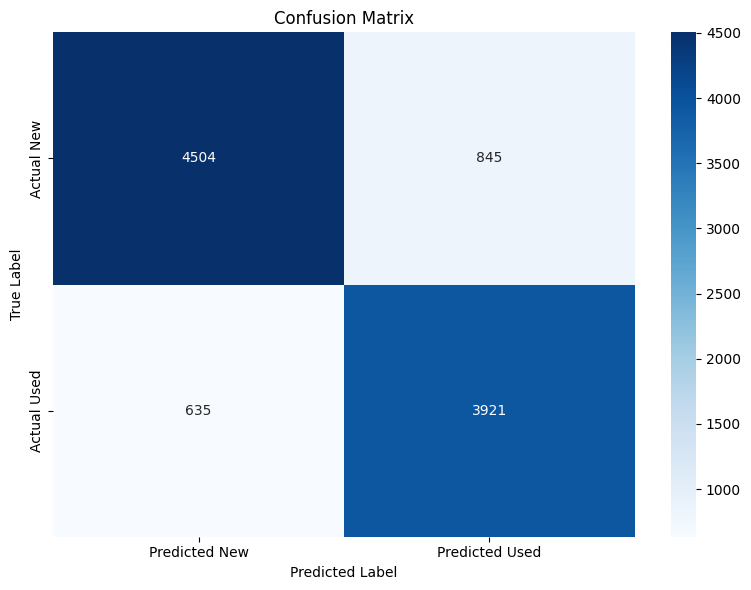

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

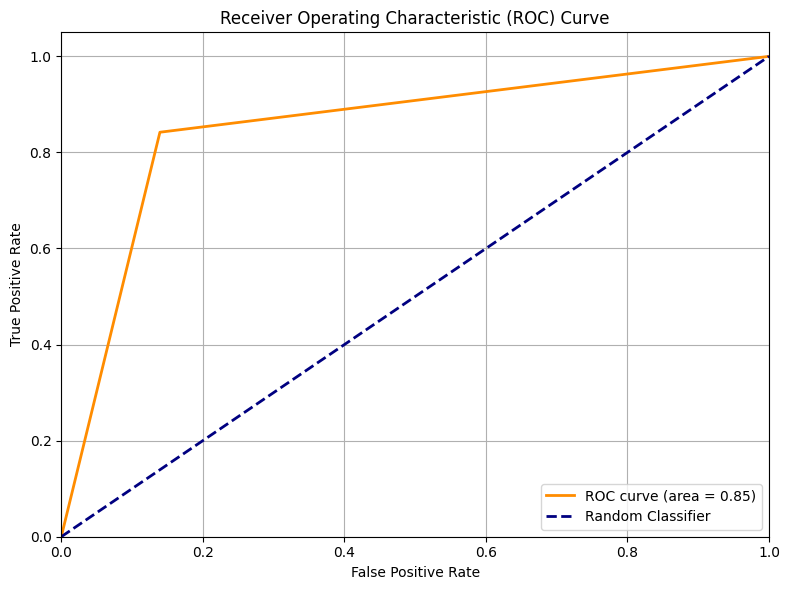

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [70]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [71]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'pr...
model                                           XGBClassifier
items                          {'train': 89109, 'test': 9905}
cm          [[0.8448308094971022, 0.15516919050289774], [0...
metrics     {'new': {'precision': 0.8720571208027789, 'rec...
roc_auc                                              0.849654
Name: 11, dtype: object

## Analysis

By combining the manual selection with the insight from RFE all reference metrics were improved a little more.

---
# 13º iteration - Including RFE discoveries

In [4]:
index = len(history) # used for logging
history.loc[index] = None # Creates an empty row

In [3]:
X_train, y_train, X_test, y_test = load_processed_data()

Importing data from 'new_or_used.py'…
Starting preprocessing…
Succesfully finished.



In [ ]:
# Taking out manually similar features (both selected)
filter_out = ['tag_poor_quality_thumbnail', 'local_pick_up', 'free_shipping']

In [44]:
# Taking out manually similar features (both selected)
#filter_out=['initial_quantity', 'listing_type_id_free','quant_single_unit']
X_train.drop(columns=filter_out,inplace=True)
X_test.drop(columns=filter_out,inplace=True)

In [ ]:
X_train['']

In [45]:
X_train.columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'free_tier',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'duration',
       'quant_single_unit', 'has_parent_item', 'tag_good_quality_thumbnail',
       'tag_free_relist', 'tag_dragged_visits', 'tag_dragged_bids_and_visits'],
      dtype='object')

In [57]:
y_train_lbl = y_train.map(classes)
y_test_lbl = y_test.map(classes)

### Dataset info

In [58]:
size = {'train':len(X_train),'test':len(X_test)}
print("Split sizes: {} train, {} test".format(size['train'], size['test']))

Split sizes: 89109 train, 9905 test


In [59]:
features = {'train': {'feat': None, 'target': None},
            'test': {'feat': None, 'target': None}}

#### Train split

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accepts_mercadopago          89109 non-null  uint8  
 1   automatic_relist             89109 non-null  uint8  
 2   price_scaled                 89109 non-null  float64
 3   free_tier                    89109 non-null  bool   
 4   buying_mode_buy_it_now       89109 non-null  float64
 5   buying_mode_classified       89109 non-null  float64
 6   duration                     89109 non-null  int64  
 7   quant_single_unit            89109 non-null  bool   
 8   has_parent_item              89109 non-null  bool   
 9   tag_good_quality_thumbnail   89109 non-null  int64  
 10  tag_free_relist              89109 non-null  int64  
 11  tag_dragged_visits           89109 non-null  int64  
 12  tag_dragged_bids_and_visits  89109 non-null  int64  
dtypes: bool(3), floa

In [61]:
y_train_lbl.value_counts()

new     47859
used    41250
Name: count, dtype: int64

#### Test split

In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9905 entries, 0 to 9904
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accepts_mercadopago          9905 non-null   uint8  
 1   automatic_relist             9905 non-null   uint8  
 2   price_scaled                 9905 non-null   float64
 3   free_tier                    9905 non-null   bool   
 4   buying_mode_buy_it_now       9905 non-null   float64
 5   buying_mode_classified       9905 non-null   float64
 6   duration                     9905 non-null   int64  
 7   quant_single_unit            9905 non-null   bool   
 8   has_parent_item              9905 non-null   bool   
 9   tag_good_quality_thumbnail   9905 non-null   int64  
 10  tag_free_relist              9905 non-null   int64  
 11  tag_dragged_visits           9905 non-null   int64  
 12  tag_dragged_bids_and_visits  9905 non-null   int64  
dtypes: bool(3), float6

In [63]:
y_test_lbl.value_counts()

new     5349
used    4556
Name: count, dtype: int64

#### Logging

In [64]:
# Keep tracking of every feature
history.at[index, 'items'] = size
features['train']['feat'] = X_train.columns.to_list()
features['test']['feat'] = X_test.columns.to_list()
features['train']['target'] = y_train_lbl.value_counts().to_dict()
features['test']['target'] = y_test_lbl.value_counts().to_dict()
history.at[index, 'features'] = features

In [65]:
history

,features,model,items,cm,metrics,roc_auc
training,,,,,,
0,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9590577678070668, 0.04094223219293326], [0...","{'new': {'precision': 0.6804615996816554, 'rec...",0.715152
1,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
2,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
3,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
4,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.9584969153112731, 0.04150308468872686], [0...","{'new': {'precision': 0.680605336519315, 'reca...",0.715201
5,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.5427182650962796, 0.4572817349037203], [0....","{'new': {'precision': 0.9647723496178132, 'rec...",0.759726
6,"{'train': {'feat': ['accepts_mercadopago', 'au...",LogisticRegression,"{'train': 89109, 'test': 9905}","[[0.7218171620863713, 0.2781828379136287], [0....","{'new': {'precision': 0.8847387717690193, 'rec...",0.805707
7,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7765937558422135, 0.2234062441577865], [0....","{'new': {'precision': 0.8795257251746771, 'rec...",0.825852
8,"{'train': {'feat': ['accepts_mercadopago', 'au...",RandomForestClassifier,"{'train': 89109, 'test': 9905}","[[0.7932323798840905, 0.20676762011590952], [0...","{'new': {'precision': 0.8797428986108231, 'rec...",0.832964


## Random Search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# Define the parameter distribution
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # Step size shrinkage
    'max_depth': [3, 4, 5, 6, 7, 8],            # Maximum depth of a tree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],     # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],           # Minimum loss reduction for a split
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],      # L1 regularization term
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]      # L2 regularization term
}

# Implement RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled.
#         A higher number means a more exhaustive search but takes longer.
# cv: Number of folds for cross-validation.
# scoring: Metric to optimize (e.g., 'accuracy', 'f1', 'roc_auc').
#          'f1_weighted' or 'f1_macro' are good for imbalanced datasets.
# verbose: Controls the verbosity of the output.
# n_jobs: Number of jobs to run in parallel (-1 means using all available processors).
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_distributions,
                                   n_iter=50, # Number of random combinations to try
                                   cv=5,      # 5-fold cross-validation
                                   scoring='accuracy', # Or 'f1_macro', 'accuracy', 'roc_auc'
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

print("Starting Random Search for n_estimators...")
random_search.fit(X_train, y_train)
print("Random Search complete.")

# Get the best parameters and best score
print(f"\nBest n_estimators found: {random_search.best_params_['n_estimators']}")
print(f"Best cross-validation score (f1_weighted): {random_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("\n--- Evaluation of Best Model on Test Set ---")
overall_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {overall_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Starting Random Search for n_estimators...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=600, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   4.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=1000, re

In [16]:
random_search.best_params_

{'subsample': 0.7,
 'reg_lambda': 1,
 'reg_alpha': 0.001,
 'n_estimators': np.int64(700),
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

## Model training

In [17]:
import xgboost as xgb

# Implement the XGBoost Classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification with probability output
    eval_metric='logloss',        # Metric used for evaluation during training
    # Tuned parameters:
    n_estimators=np.int64(700),   # No change
    learning_rate=0.05,           # Updated from 0.1
    max_depth=5,                  # Updated from 4
    subsample=0.7,                # Updated from 0.6
    colsample_bytree=0.7,         # Updated from 1.0
    gamma=0.1,                    # Updated from 0.4
    reg_alpha=0.001,              # No change
    reg_lambda=1,                 # Updated from 0.1
    random_state=42
)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [18]:
# Train the model using the scaled training data
print("Training XGBoost model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training XGBoost model...
Model training complete.


## Model evaluation

In [19]:
# Predict on the scaled test data
y_pred = model.predict(X_test)
y_pred_lbl = pd.Series(y_pred).map(classes)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test) 

In [20]:
# PERFORMANCE EVALUATION
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test_lbl, y_pred_lbl,digits=3)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8503

Classification Report:
              precision    recall  f1-score   support

         new      0.869     0.851     0.860      5349
        used      0.829     0.850     0.839      4556

    accuracy                          0.850      9905
   macro avg      0.849     0.850     0.850      9905
weighted avg      0.851     0.850     0.850      9905



In [21]:
f1_score(y_test, y_pred,average='binary')

0.8598960793575815

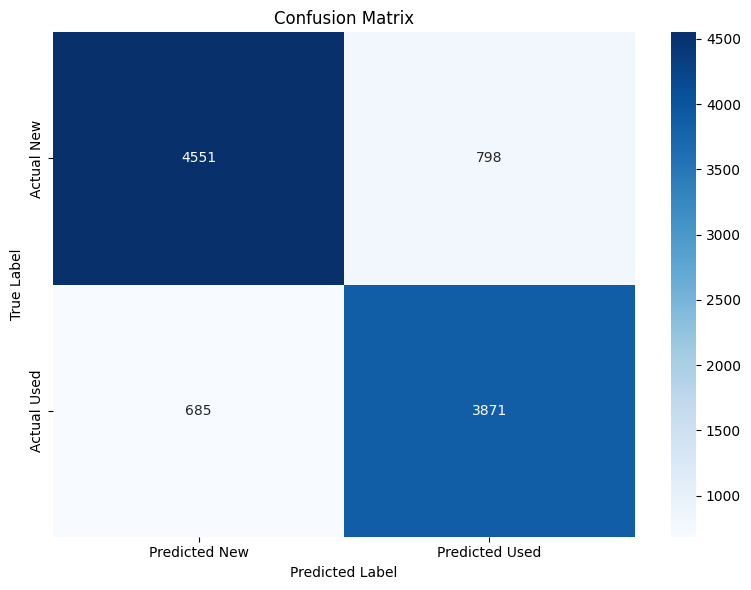

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lbl, y_pred_lbl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted New', 'Predicted Used'],
            yticklabels=['Actual New', 'Actual Used'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
if save_graph: plt.savefig('confusion_matrix.png')

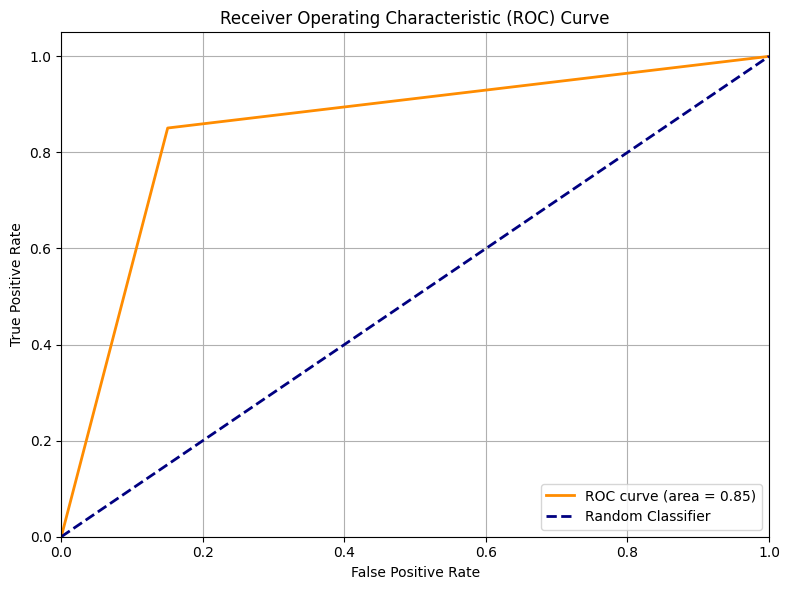

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the probabilities of the positive class (second column)
#y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
if save_graph: plt.savefig('roc_auc_curve.png')

#### Logging

In [66]:
# Keep tracking of every metric
history.at[index, 'cm'] = confusion_matrix(y_test_lbl, y_pred_lbl,normalize='true').tolist()
history.at[index, 'metrics'] = classification_report(y_test_lbl, y_pred_lbl,output_dict=True)
history.at[index, 'roc_auc'] = auc(fpr, tpr)
history.to_csv('./data/train_logs.csv') # Save logging file locally

In [67]:
history.iloc[index]

features    {'train': {'feat': ['accepts_mercadopago', 'au...
model                                           XGBClassifier
items                          {'train': 89109, 'test': 9905}
cm          [[0.8420265470181343, 0.15797345298186577], [0...
metrics     {'new': {'precision': 0.8764351041058571, 'rec...
roc_auc                                              0.851325
Name: 12, dtype: object

## Analysis

By combining the manual selection with the insight from RFE all reference metrics were improved a little more.

## Recursive Feature Selection (RFE)

In [26]:
import xgboost as xgb

# Implement the XGBoost Classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification with probability output
    eval_metric='logloss',        # Metric used for evaluation during training
    # Tuned parameters:
    n_estimators=np.int64(700),   # No change
    learning_rate=0.05,           # Updated from 0.1
    max_depth=5,                  # Updated from 4
    subsample=0.7,                # Updated from 0.6
    colsample_bytree=0.7,         # Updated from 1.0
    gamma=0.1,                    # Updated from 0.4
    reg_alpha=0.001,              # No change
    reg_lambda=1,                 # Updated from 0.1
    random_state=42
)

history.at[index, 'model'] = model.__class__.__name__ # for logging

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

print("Executing chi-squared test…")
# 1. Chi-squared test to select relevant categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns
selected_features = []
for feature in categorical_features:
    crosstab = pd.crosstab(X_train[feature], y_train)
    chi2, p, _, _ = chi2_contingency(crosstab)
    if p < 0.05:
        selected_features.append(feature)

# 2. Encode selected categorical features
encoder = LabelEncoder()
for feature in selected_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])

# 3. Recursively eliminate irrelevant features
print("Applying RFE…")
rfe = RFE(model, n_features_to_select=12) 
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Executing chi-squared test…
Applying RFE…


In [36]:
X_train.columns[rfe.support_].tolist()

['accepts_mercadopago',
 'automatic_relist',
 'price_scaled',
 'free_tier',
 'buying_mode_buy_it_now',
 'buying_mode_classified',
 'duration',
 'quant_single_unit',
 'has_parent_item',
 'tag_good_quality_thumbnail',
 'tag_free_relist',
 'tag_dragged_bids_and_visits']

In [37]:
# Get features names
selected_feature_names = X_train.columns[rfe.support_].tolist()

feature_rankings = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

In [38]:
# Selected Features
feature_rankings[feature_rankings['Selected']==True]

,Feature,Ranking,Selected
0,accepts_mercadopago,1,True
1,automatic_relist,1,True
2,price_scaled,1,True
3,free_tier,1,True
4,buying_mode_buy_it_now,1,True
5,buying_mode_classified,1,True
6,duration,1,True
7,quant_single_unit,1,True
8,has_parent_item,1,True
9,tag_good_quality_thumbnail,1,True


**Manual Feature Selection (previous)** - bold features were already chosen by RFE
- **'accepts_mercadopago'**
- 'automatic_relist',
- **'price_scaled'**
- 'is_USD',
- **'free_tier'** = listing_type_id_free
- **'buying_mode_buy_it_now'**
- **'buying_mode_classified'**
- 'is_weekend', 
- 'is_working_hours',
- **'has_parent_item'**
- 'has_store',
- 'high_ticket',
- **'quant_single_unit'** <-> initial_quantity
- 'quant_small'

**New RFE selection:**
- duration

2 pairs of the selected features were similar to each other. That indicates that it may be reduced even more, down to 8 features.

In [39]:
# Discarded Features
feature_rankings[feature_rankings['Selected']==False]

,Feature,Ranking,Selected
12,tag_dragged_visits,2,False
10,tag_poor_quality_thumbnail,3,False
14,local_pick_up,4,False
15,free_shipping,5,False


As we can verify, the top next features in ranking are already represented in our dataset by other derived or highly correlated features. So no improvement is expected by including them.

# Save trained model

In [ ]:
import joblib
import os

# Define the path to save the model
model_filename = 'xgboost_model.joblib'
save_directory = 'models' # A dedicated folder for saved models

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

full_path = os.path.join(save_directory, model_filename)

# Save the trained model
joblib.dump(model, full_path)

print(f"XGBoost model saved successfully to: {full_path}")

# To load the model:
# loaded_xgboost_model = joblib.load(full_path)
# print("XGBoost model loaded successfully!")

XGBoost model saved successfully to: models/xgboost_model.joblib
